# **SMAI Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

## _Problem - 3_

> Using Lance-Williams algorithm

Available Linkage Methods:
- Single Linkage
- Complete Linkage
- Group Average Linkage
- Weighted Average Linkage
- Centroid Linkage
- Ward Linkage

## Utils

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [ ]:
dataset_path = "../Datasets/SMAI-Dataset-hc-dataset/new_customers.csv"
gene_dataset_path = "../Datasets/SMAI-Dataset-gene-expression/gene.csv"

In [ ]:
class HierarchicalClustering:
    def __init__(self):
        self.linkage_method = 'single'
        self.X = None

    def __euclidean_dist(self, pointA, pointB):
        sum = np.sum((pointA - pointB) ** 2)
        return np.sqrt(sum)

    def __linkage_distance(self, Dki, Dkj, Dij, ni = None, nj = None, nk = None):
        difference = abs(Dki - Dkj)
        ai, aj, b, c = 0, 0, 0, 0

        equation = 'ai*Dki + aj*Dkj + b*Dij + c*difference'

        if self.linkage_method == 'single':
            ai, aj, b, c = [0.5, 0.5, 0, -0.5]
        elif self.linkage_method == 'complete':
            ai, aj, b, c = [0.5, 0.5, 0, 0.5]
        elif self.linkage_method == 'weighted':
            ai, aj, b, c = [0.5, 0.5, 0, 0]
        elif self.linkage_method == 'average':
            assert ni is not None and nj is not None, "ni and nj must be provided for average linkage"
            ai = ni/(ni+nj)
            aj = nj/(ni+nj)
            b = 0
            c = 0
        elif self.linkage_method == 'centroid':
            assert ni is not None and nj is not None, "ni and nj must be provided for centroid linkage"
            ai = ni/(ni+nj)
            aj = nj/(ni+nj)
            b = -ni*nj/(ni+nj)**2
            c = 0
        elif self.linkage_method == 'ward':
            assert ni is not None and nj is not None and nk is not None, "ni, nj and nk must be provided for ward linkage"
            ai = (ni+nk)/(ni+nj+nk)
            aj = (nj+nk)/(ni+nj+nk)
            b = -nk/(ni+nj+nk)
            c = 0
        
        return eval(equation)
    
    def linkages(self, X, linkage_method='single'):
        
        assert linkage_method in ['single', 'complete', 'average', 'weighted', 'centroid', 'ward'], "Unknown Linkage Method"
        self.linkage_method = linkage_method
        self.X = X

        n = X.shape[0]
        clusters = dict()
        for i in range(n):
            clusters[i] = [i,]
        # clusters = [(i, [i]) for i in range(n)]

        D=dict()
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                D[(i,j)] = self.__euclidean_dist(X[i], X[j])

        Z = []
        for _ in range(n-1):
            min_i, min_j = min(D, key=D.get)
            min_dist = D[(min_i, min_j)]

            cluster1, data1 = min_i, clusters[min_i]
            cluster2, data2 = min_j, clusters[min_j]
            n1, n2 = len(data1), len(data2)
            new_cluster_data = data1 + data2
            new_cluster = n + len(Z)

            del clusters[min_i]
            del clusters[min_j]

            D1 = D.copy()
            D = {(key1, key2): value for (key1, key2), value in D.items() if key1 not in [min_i, min_j] and key2 not in [min_i, min_j]}

            for key in clusters.keys():
                Dik = D1[(min(min_i, key), max(min_i, key))]
                Djk = D1[(min(min_j, key), max(min_j, key))]
                D[(key, new_cluster)] = self.__linkage_distance(Dik, Djk, D1[(min_i, min_j)], n1, n2, len(clusters[key]))
            # for _, (cluster, data) in enumerate(clusters):
            #     print(cluster1, cluster2, cluster)
            #     Dik = D1[(min(cluster1, cluster), max(cluster1, cluster))]
            #     Djk = D1[(min(cluster2, cluster), max(cluster2, cluster))]
            #     D[(cluster, new_cluster)] = self.__linkage_distance(Dik, Djk, D1[(cluster1, cluster2)], n1, n2, len(data))

            clusters[new_cluster] = new_cluster_data
            Z.append([cluster1, cluster2, min_dist, n1 + n2])
        
        return Z


    def dendogram(self, linkage_matrix):
        fig = plt.figure(figsize=(25, 10))
        dendrogram(linkage_matrix, orientation='left')
        plt.xlabel('Cluster Distance')
        plt.ylabel('Clusters')
        plt.show()

In [ ]:
def hc(data, all=True, linkage_method='single'):
    hc = HierarchicalClustering()

    if all:
        for linkage_method in ['single', 'complete', 'average', 'weighted', 'centroid', 'ward']:
            print(f"Linkage Method: {linkage_method}")
            linkage_matrix = hc.linkages(data, linkage_method=linkage_method)
            hc.dendogram(linkage_matrix)
    else:
        linkage_matrix = hc.linkages(data, linkage_method=linkage_method)
        hc.dendogram(linkage_matrix)

## Main Code (Dataset - 1)

In [ ]:
# np.random.seed(0)
# X = np.random.rand(10, 2)  # Sample data with 10 data points and 2 features
# linkage_method = 'single'  # Choose linkage method: 'single', 'complete', or 'average'

# hc1 = HierarchicalClustering()
# linkage_matrix = hc1.linkages(X, linkage_method='single')
# hc1.dendogram(linkage_matrix)

In [8]:
data = np.loadtxt(dataset_path, delimiter=",", skiprows=1, dtype=str)
original_data = data.copy()
data[data=='Male'] = 0
data[data=='Female'] = 1
data = data.astype(float)

In [9]:
print(original_data[:5])
print(data.shape)
print(data[:5])

[['0001' 'Male' '19' '15' '39']
 ['0002' 'Male' '21' '15' '81']
 ['0003' 'Female' '20' '16' '6']
 ['0004' 'Female' '23' '16' '77']
 ['0005' 'Female' '31' '17' '40']]
(200, 5)
[[ 1.  0. 19. 15. 39.]
 [ 2.  0. 21. 15. 81.]
 [ 3.  1. 20. 16.  6.]
 [ 4.  1. 23. 16. 77.]
 [ 5.  1. 31. 17. 40.]]


### Checking Different Linkage Methods

Checking different Methods
Linkage Method: single


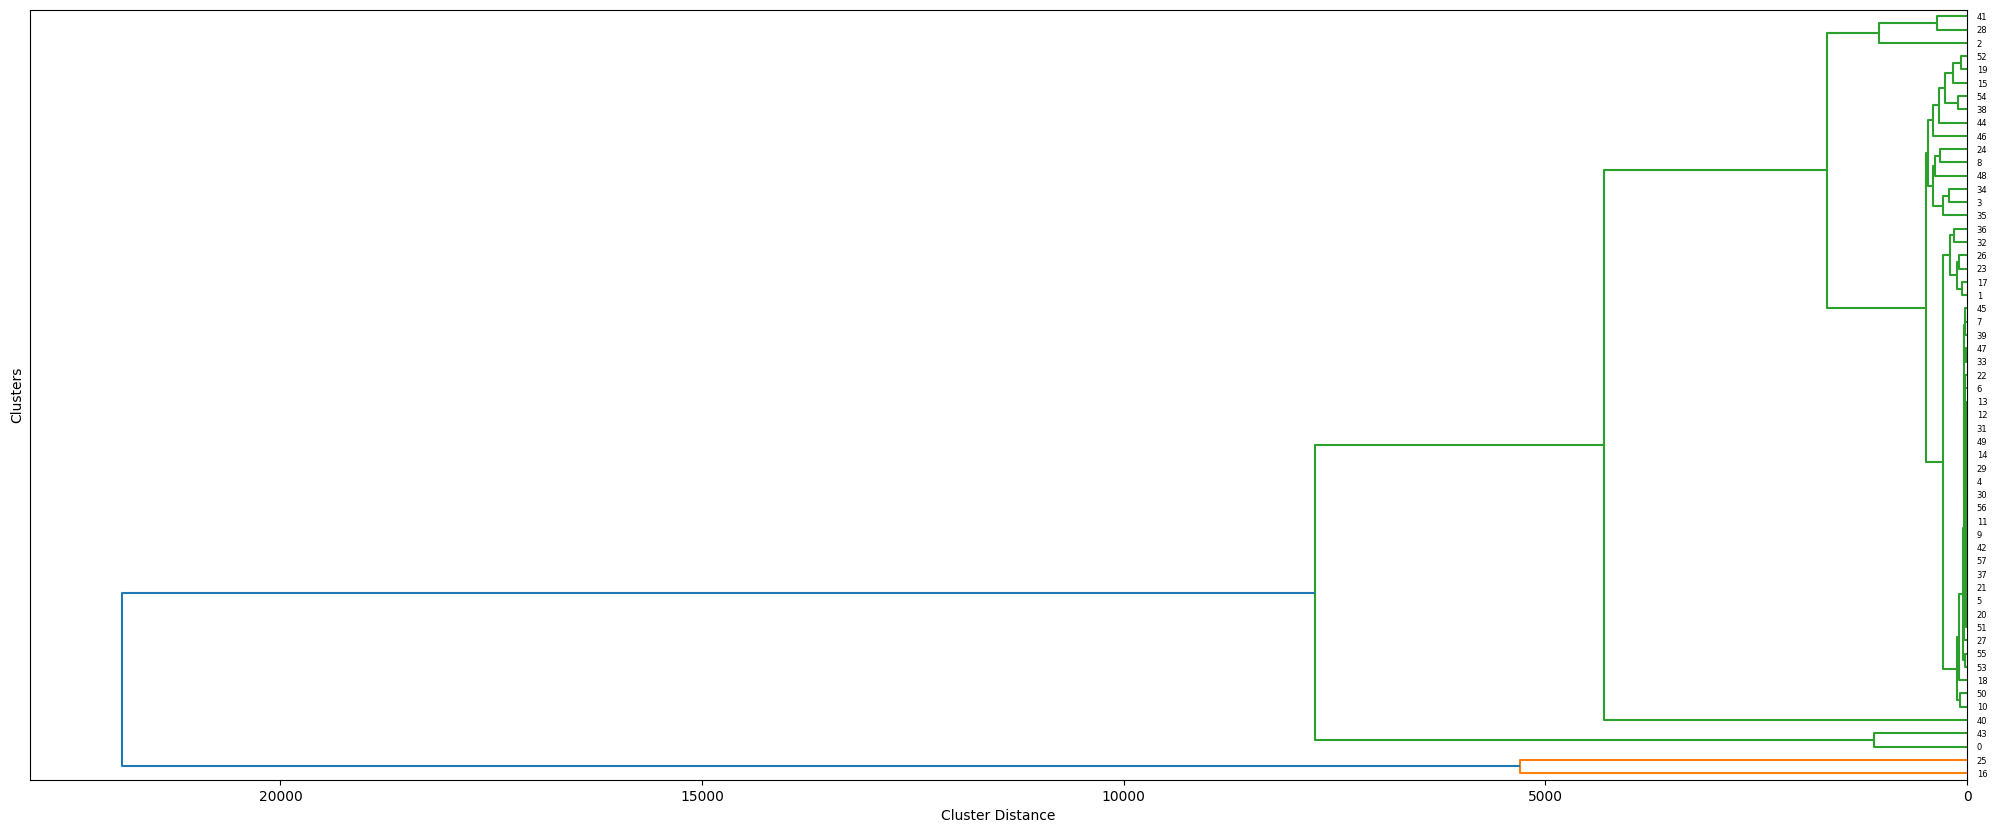

Linkage Method: complete


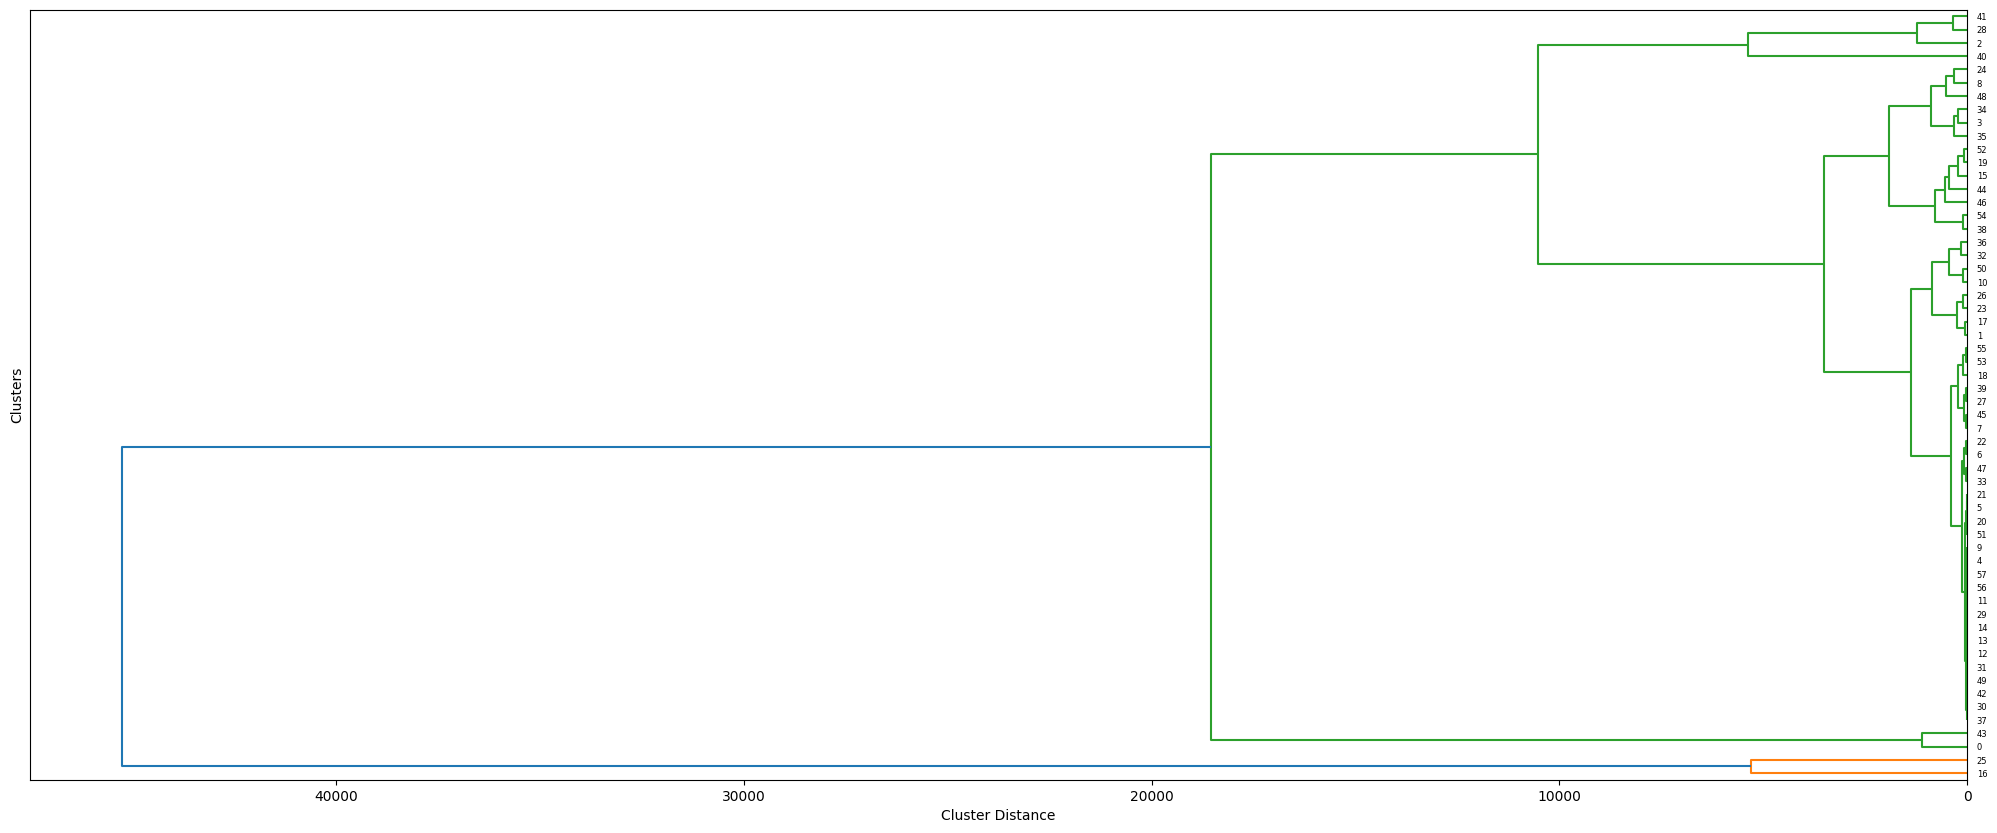

Linkage Method: average


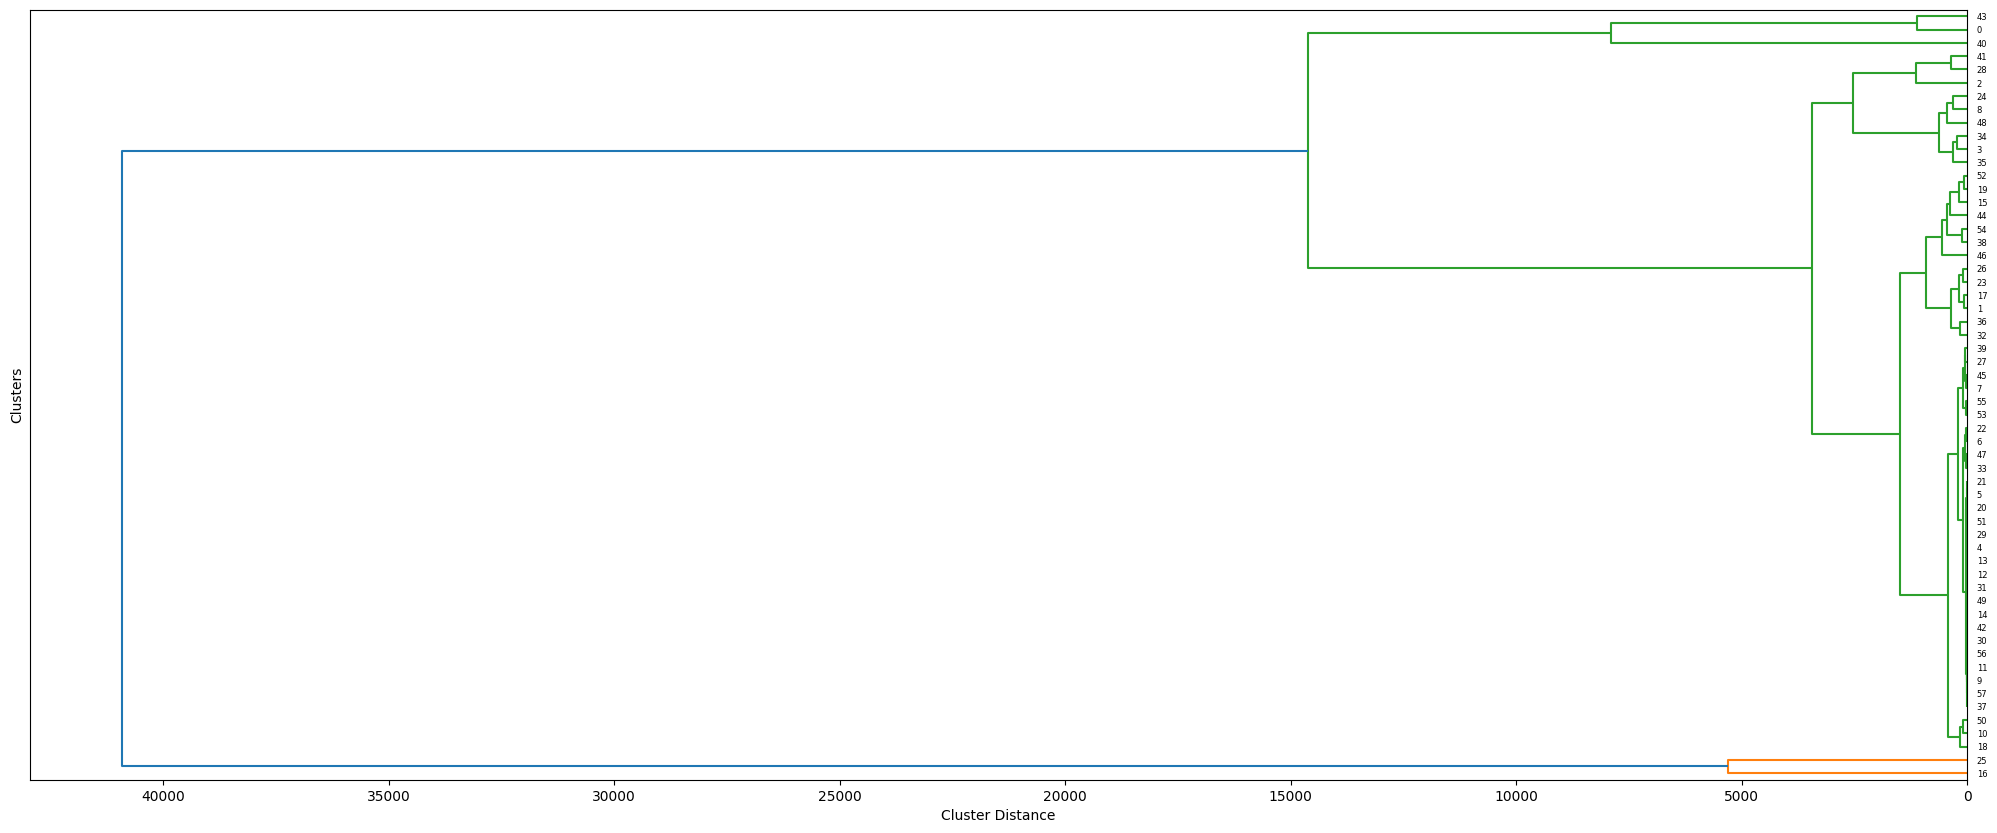

Linkage Method: weighted


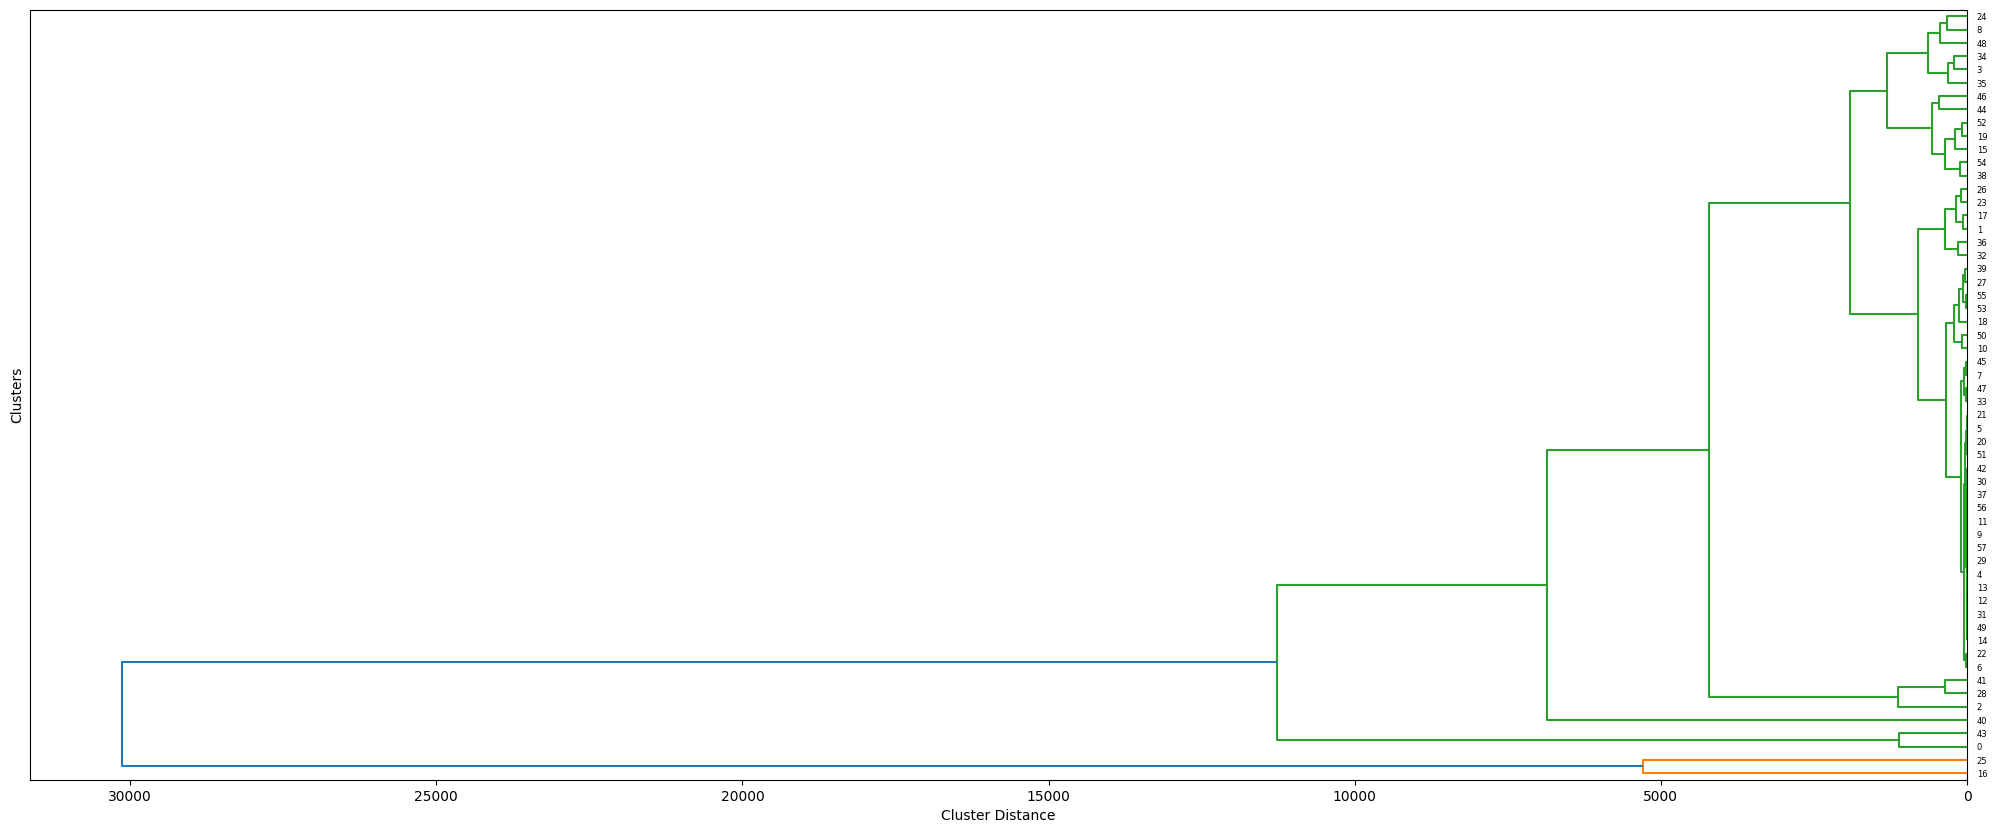

Linkage Method: centroid


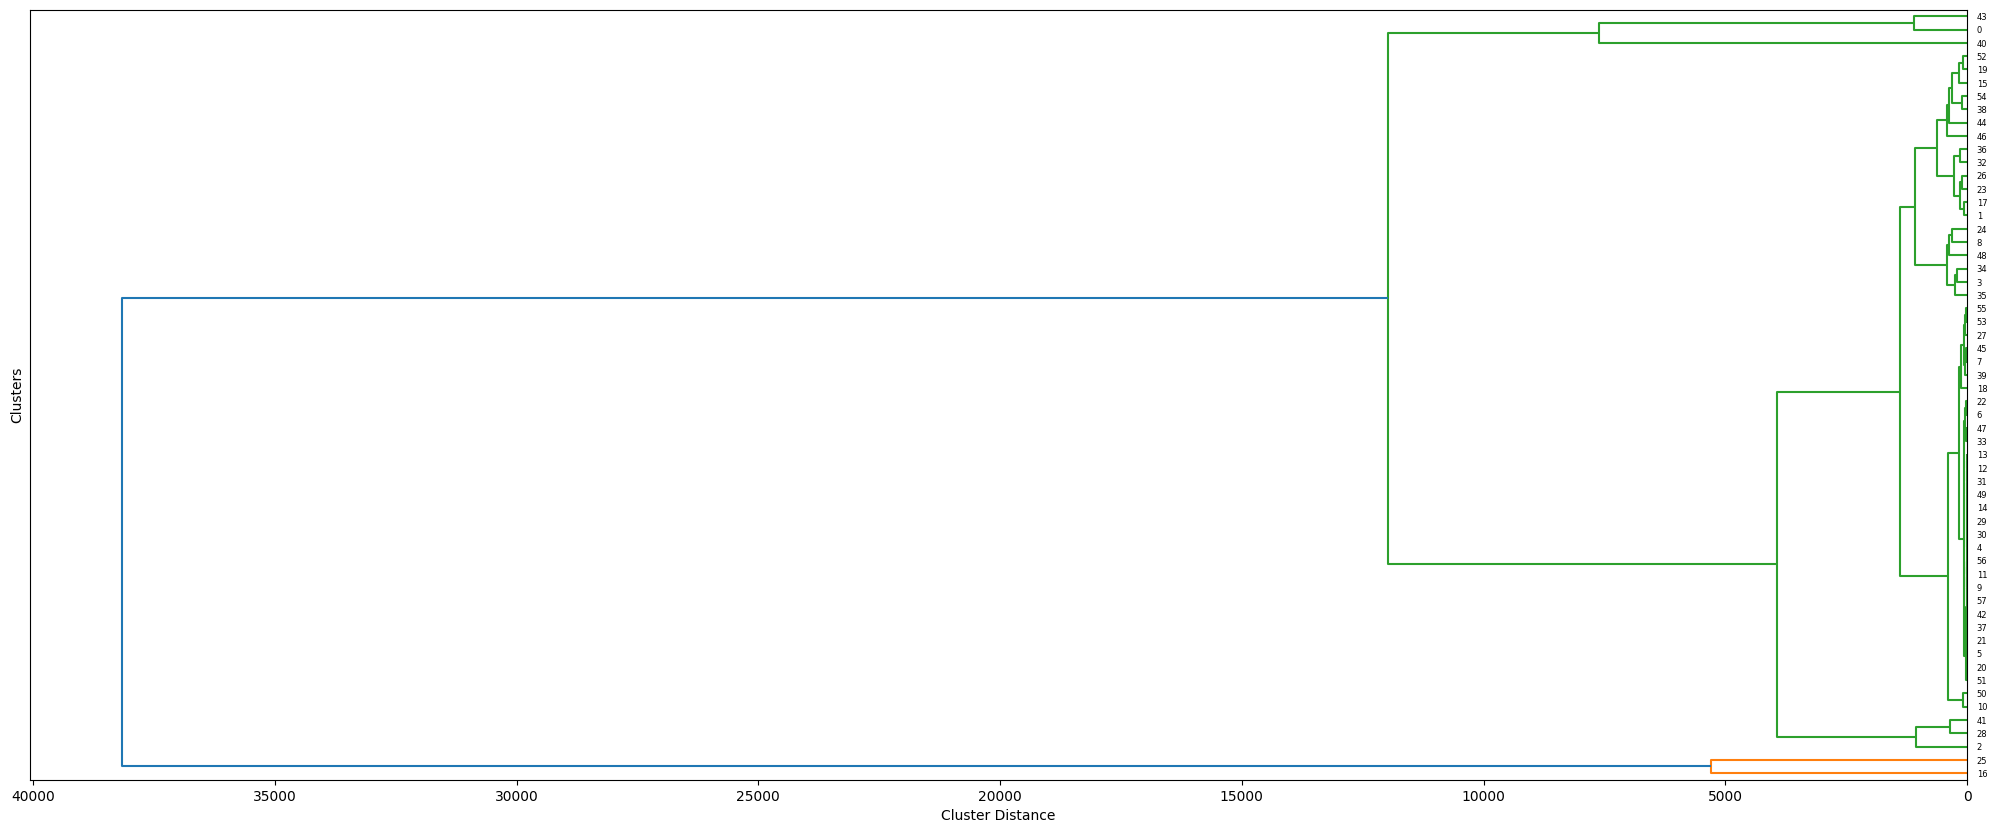

Linkage Method: ward


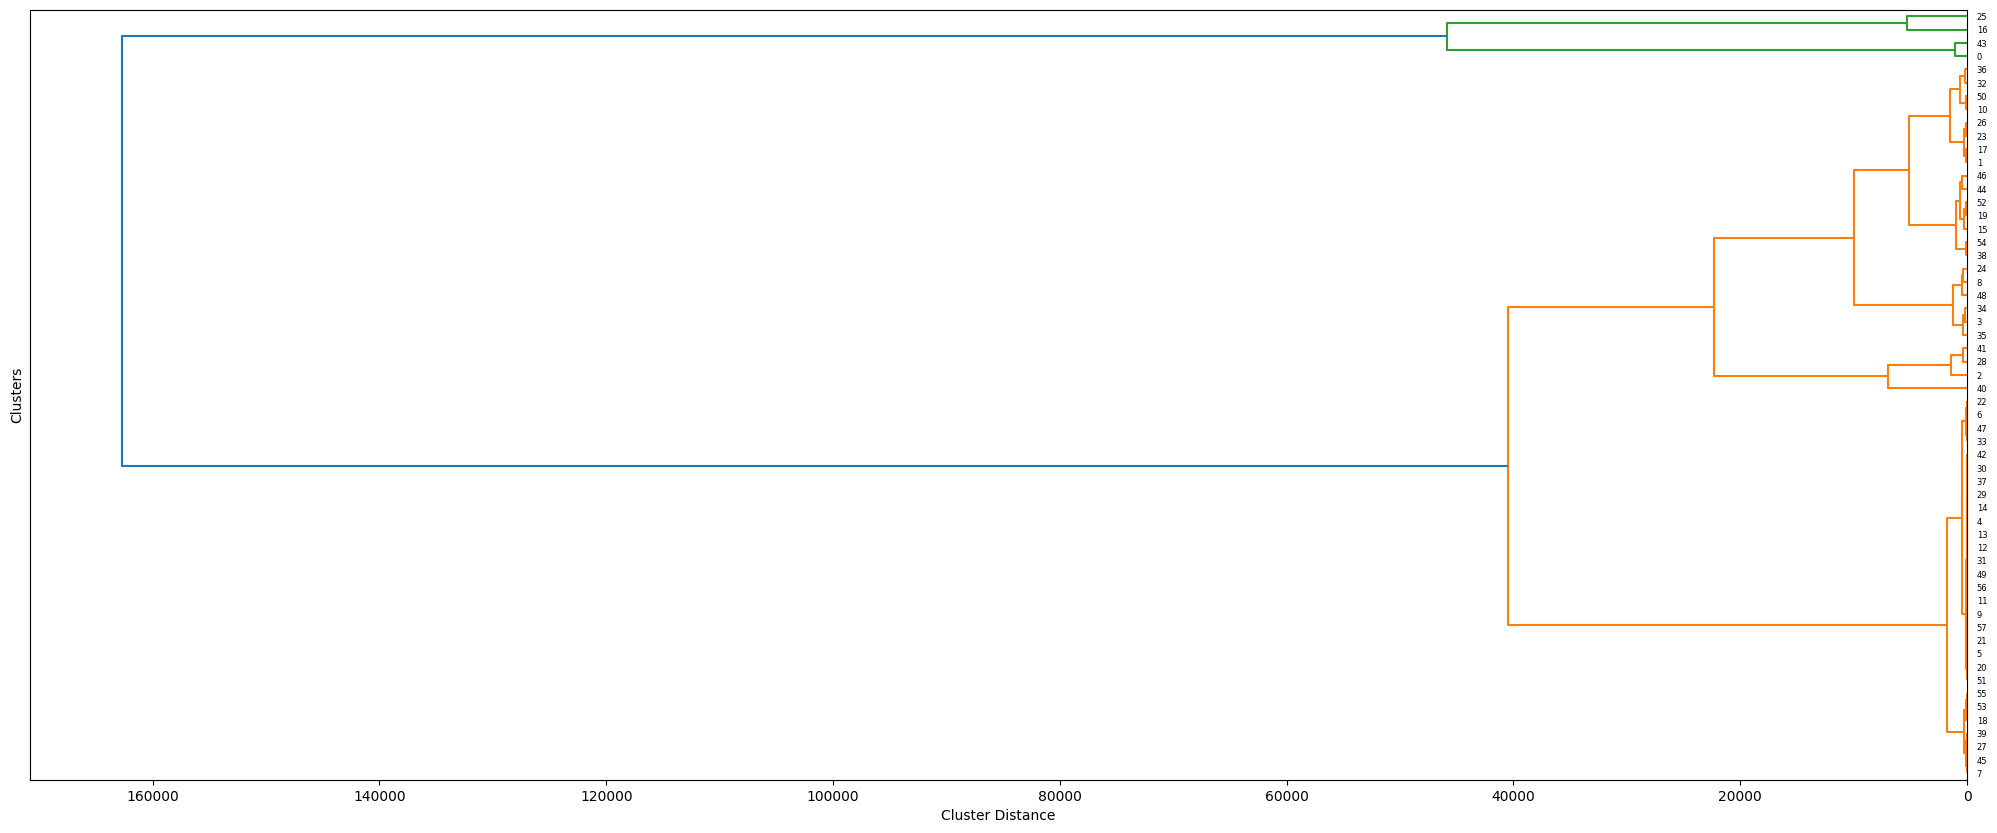

In [14]:
print("Checking different Methods")
hc(data[:, 1:])

### Checking Column Dropping

With all columns


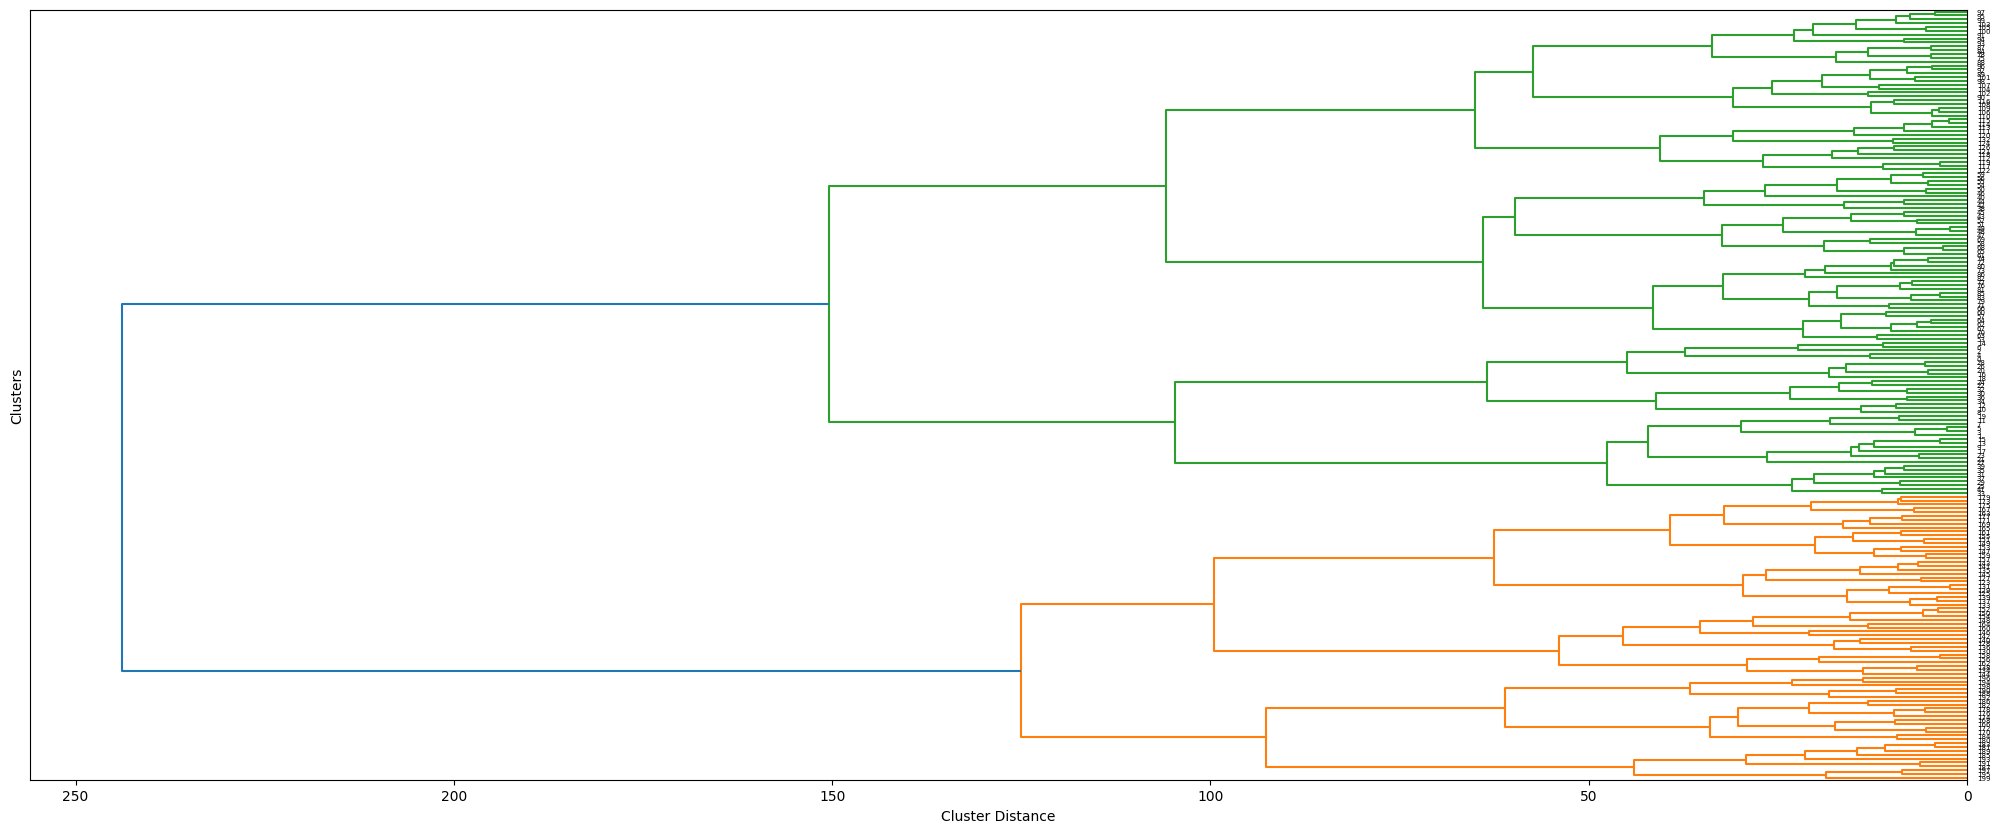

Without id column


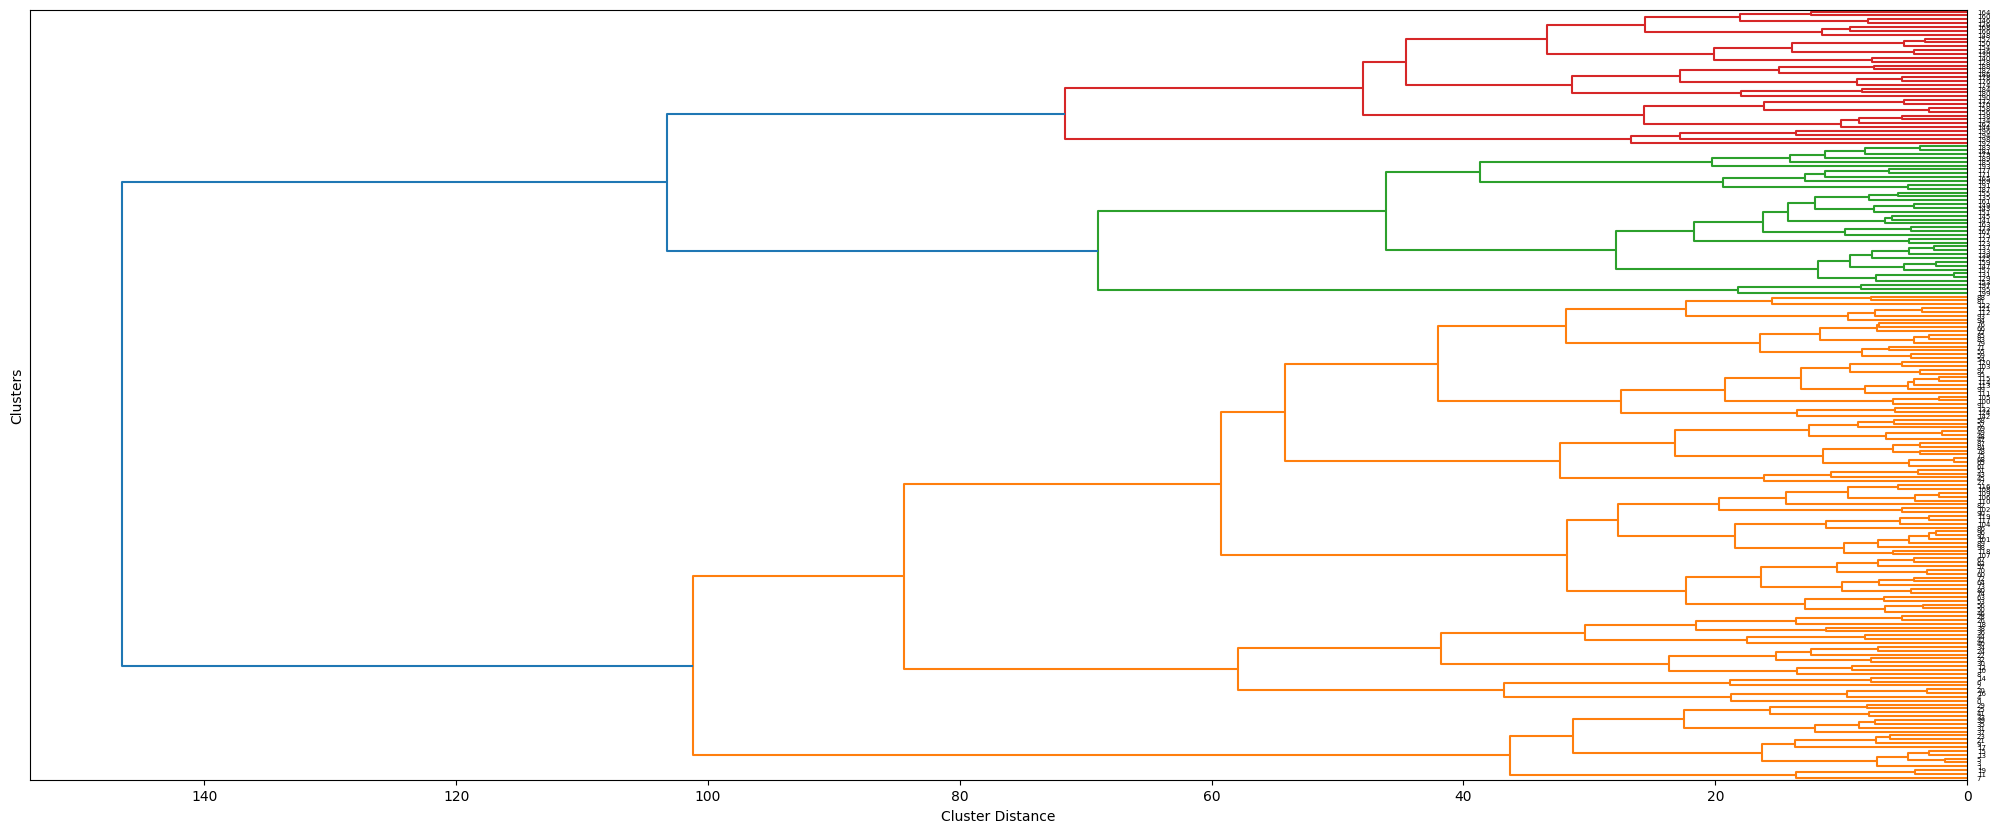

Without id, gender column


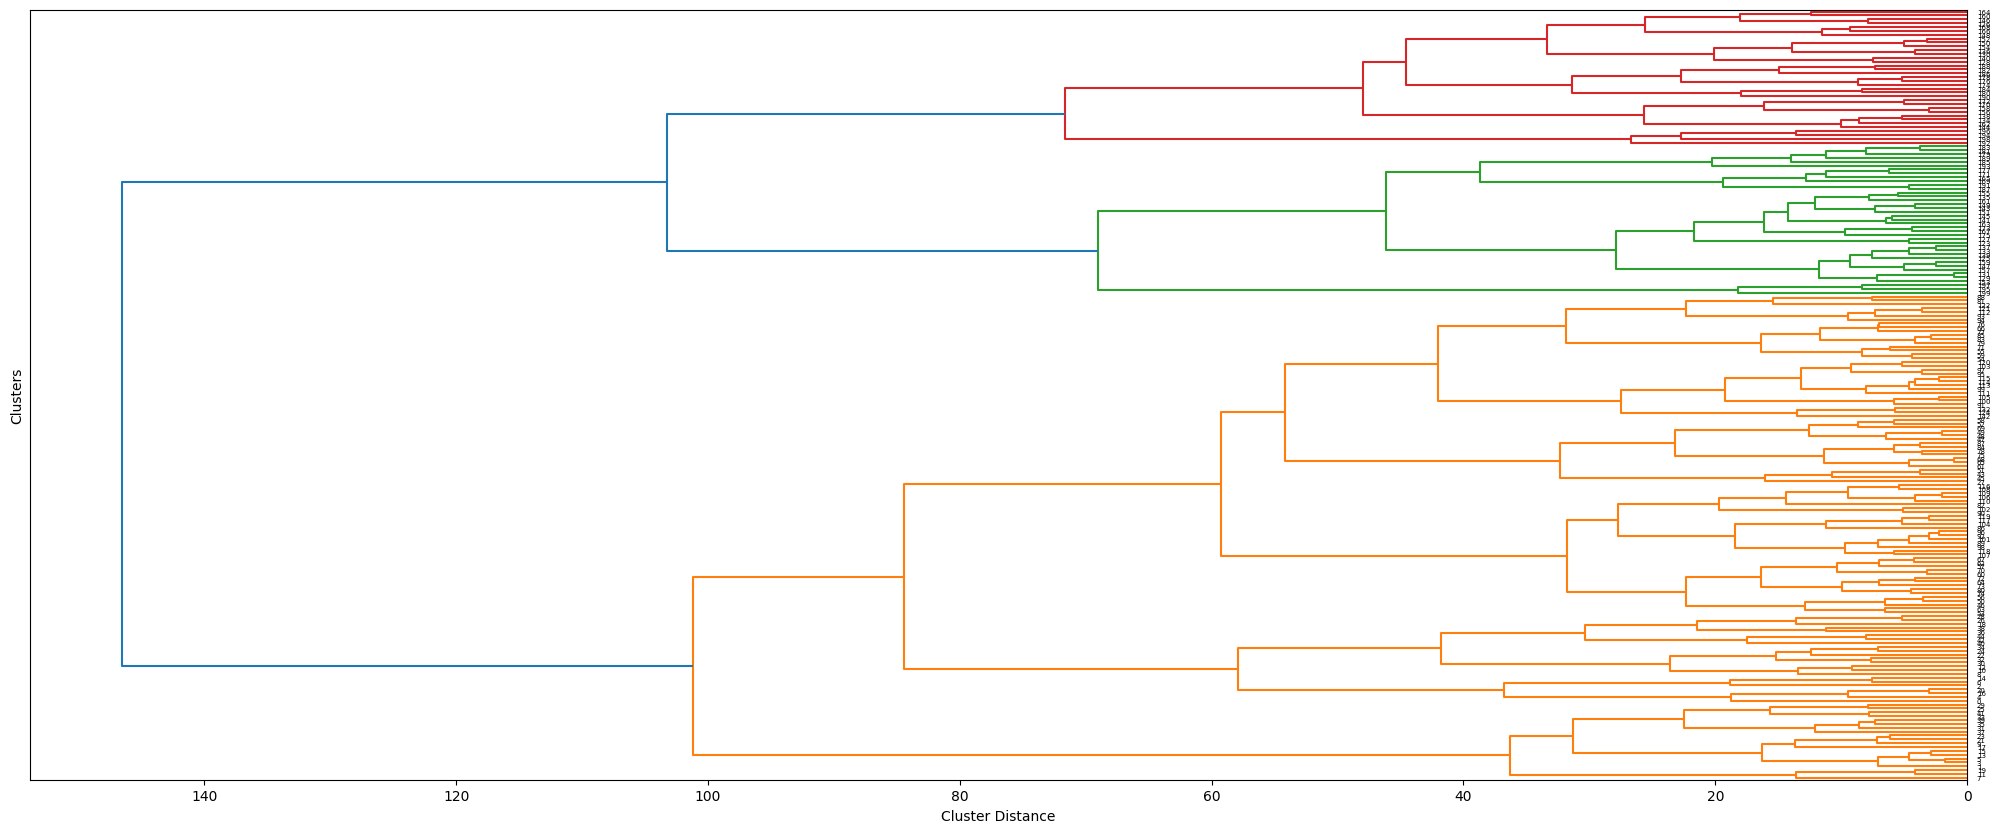

Without id, one numeric column


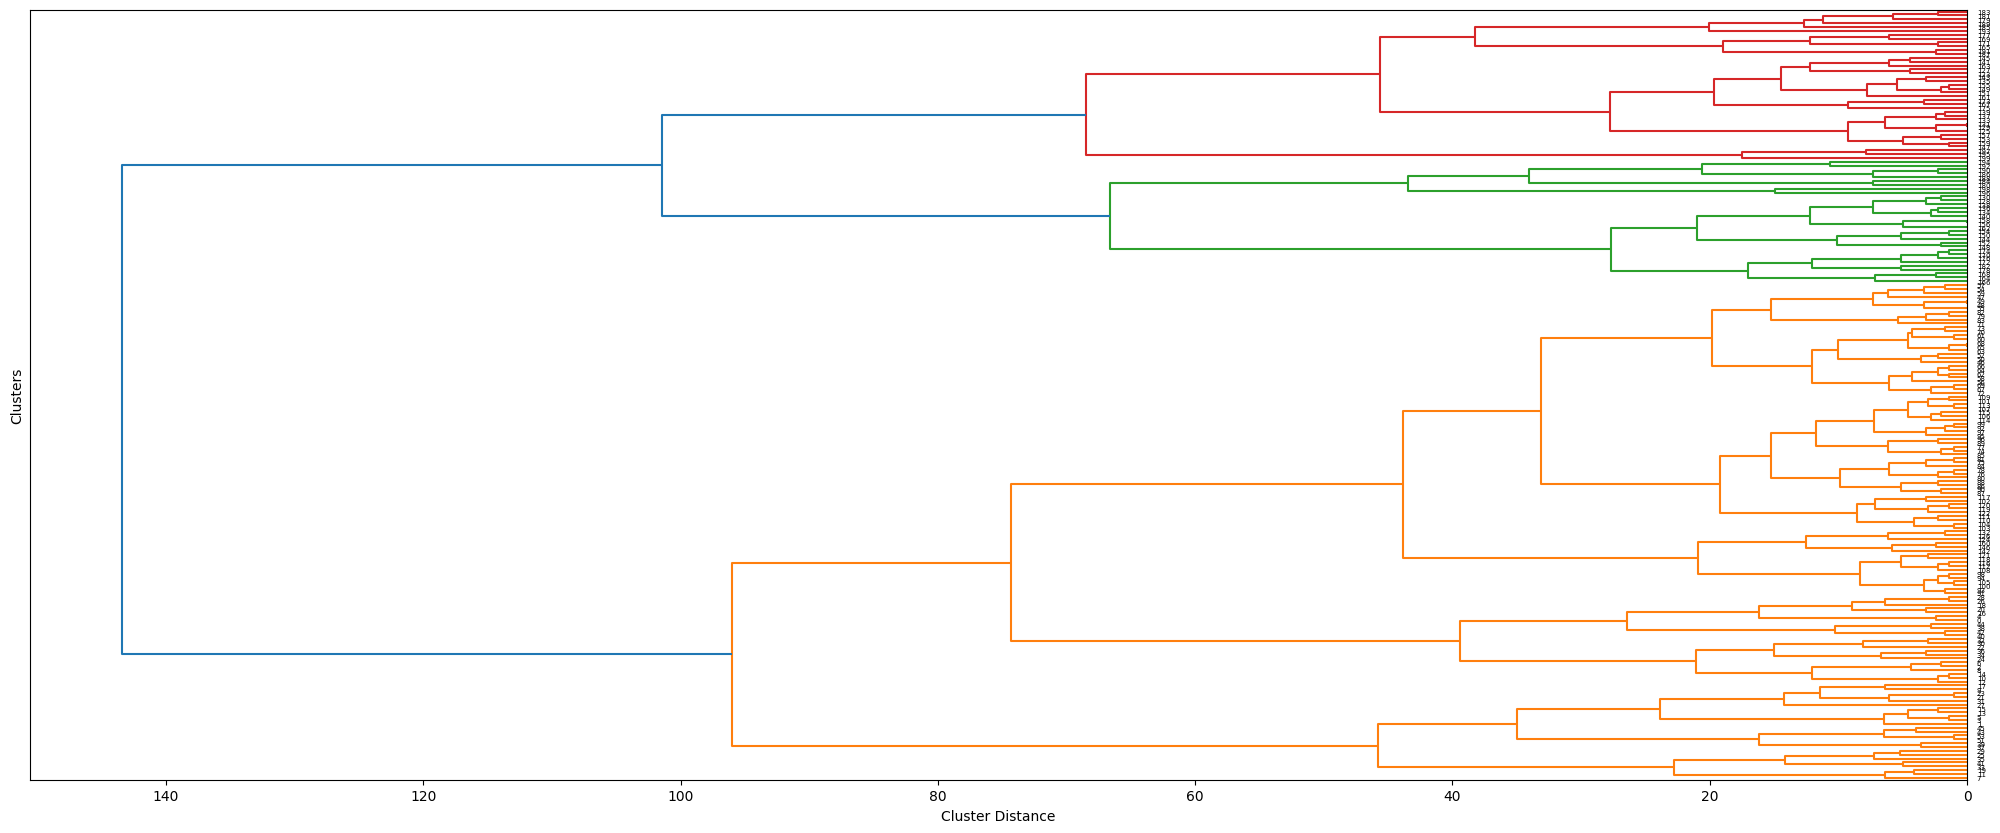

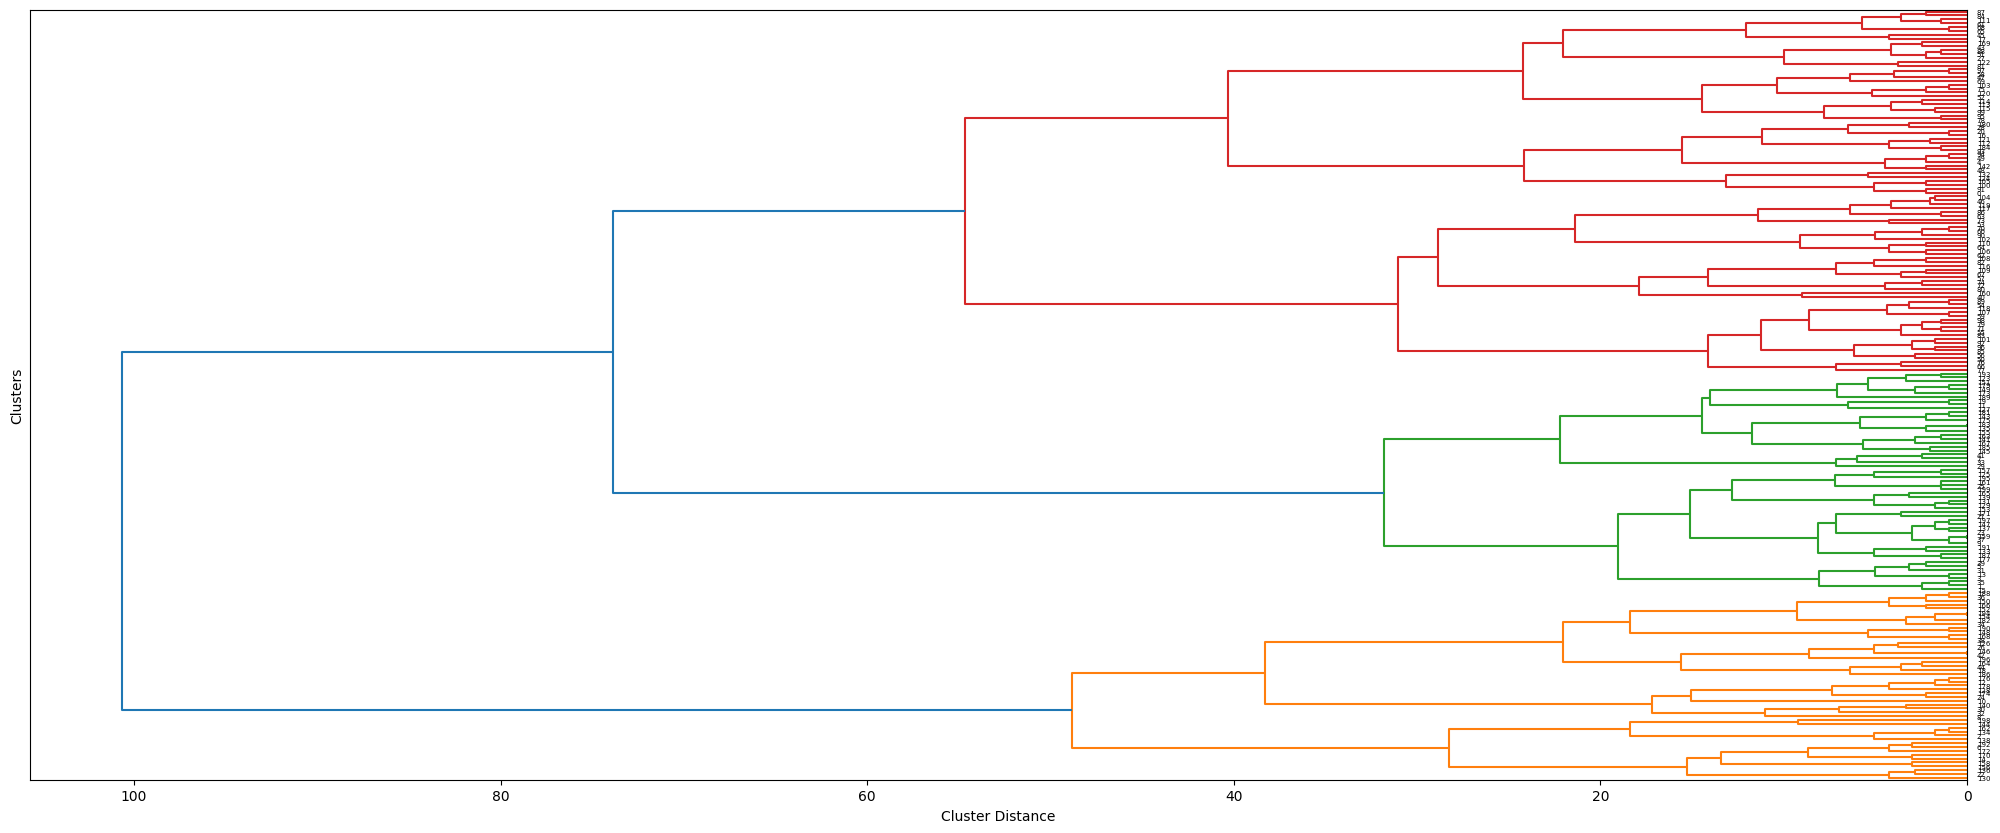

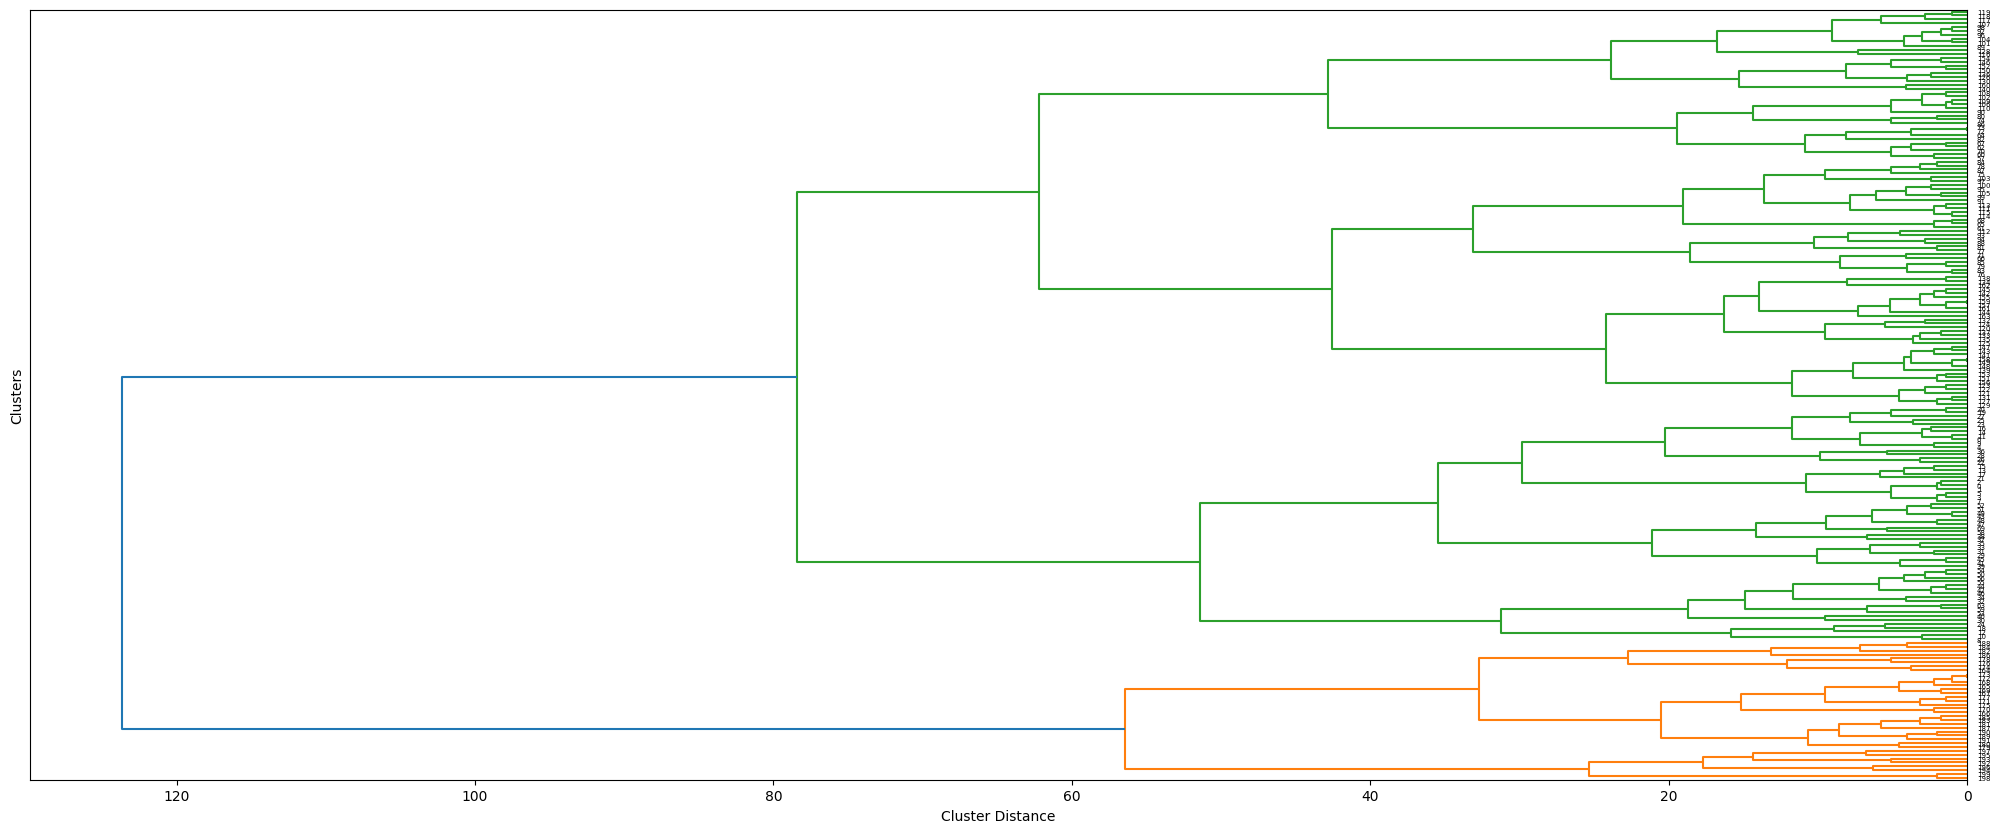

In [11]:
print("With all columns")
hc(data, all=False, linkage_method='complete')

print("Without id column")
hc(data[:, 1:], all=False, linkage_method='complete')

print("Without id, gender column")
hc(data[:, 2:], all=False, linkage_method='complete')

print("Without id, one numeric column")
hc(np.concatenate((data[:, 1:2], data[:, 3:]), axis=1), all=False, linkage_method='complete')
hc(np.concatenate((data[:, 1:3], data[:, 4:]), axis=1), all=False, linkage_method='complete')
hc(np.concatenate((data[:, 1:4], data[:, 5:]), axis=1), all=False, linkage_method='complete')

> #### Observations

`id` column is not necessary for clustering as it is just a unique identifier for each row. This can be seen from the dendrograms as well, as having this column doesn't make any difference in the clustering.

The `last numerical column` is necessary for good clustering, as without it, the clusters are not well defined. This can be seen from the dendrograms as well, as without having this cluster, the number of clusters decreases and the clusters are not well defined.

On changing the linkage method, there isn't much difference, except from change of clustering pattern among elements, which isn't making much difference in the clustering.

## Main Code (Dataset - 2)

In [12]:
data = np.loadtxt(gene_dataset_path, delimiter=",", skiprows=1, dtype=str)
original_data = data.copy()
data = data.astype(float)

### Checking Different Linkage Methods

Checking different Methods
Linkage Method: single


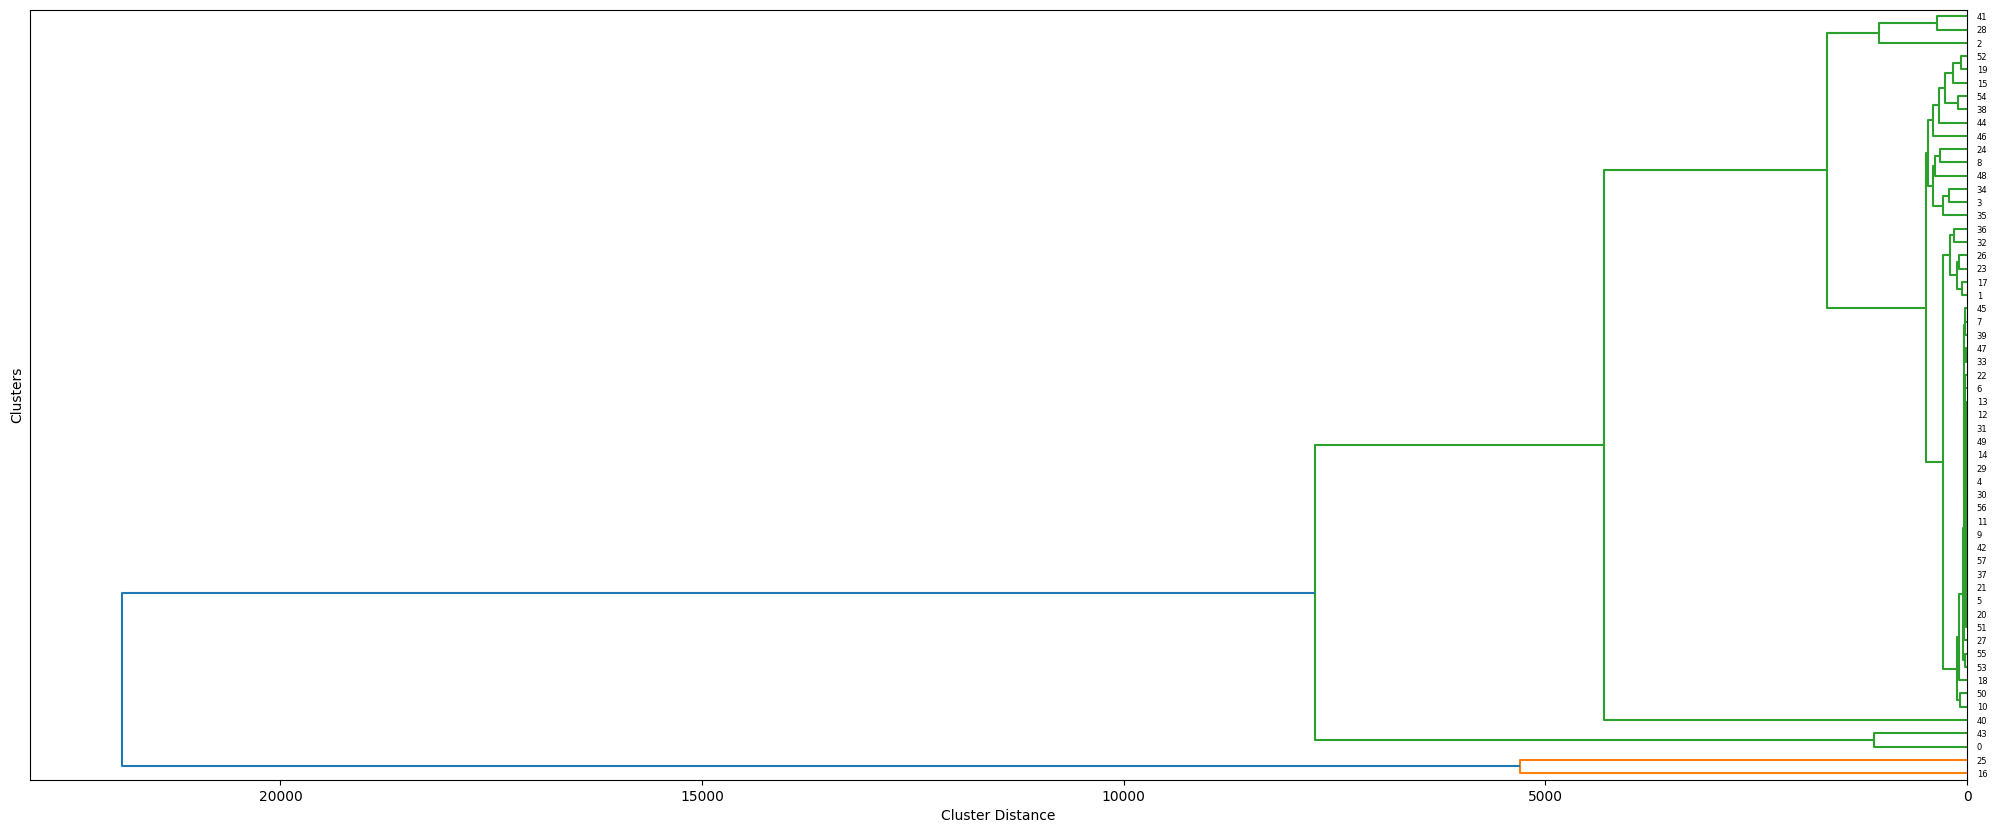

Linkage Method: complete


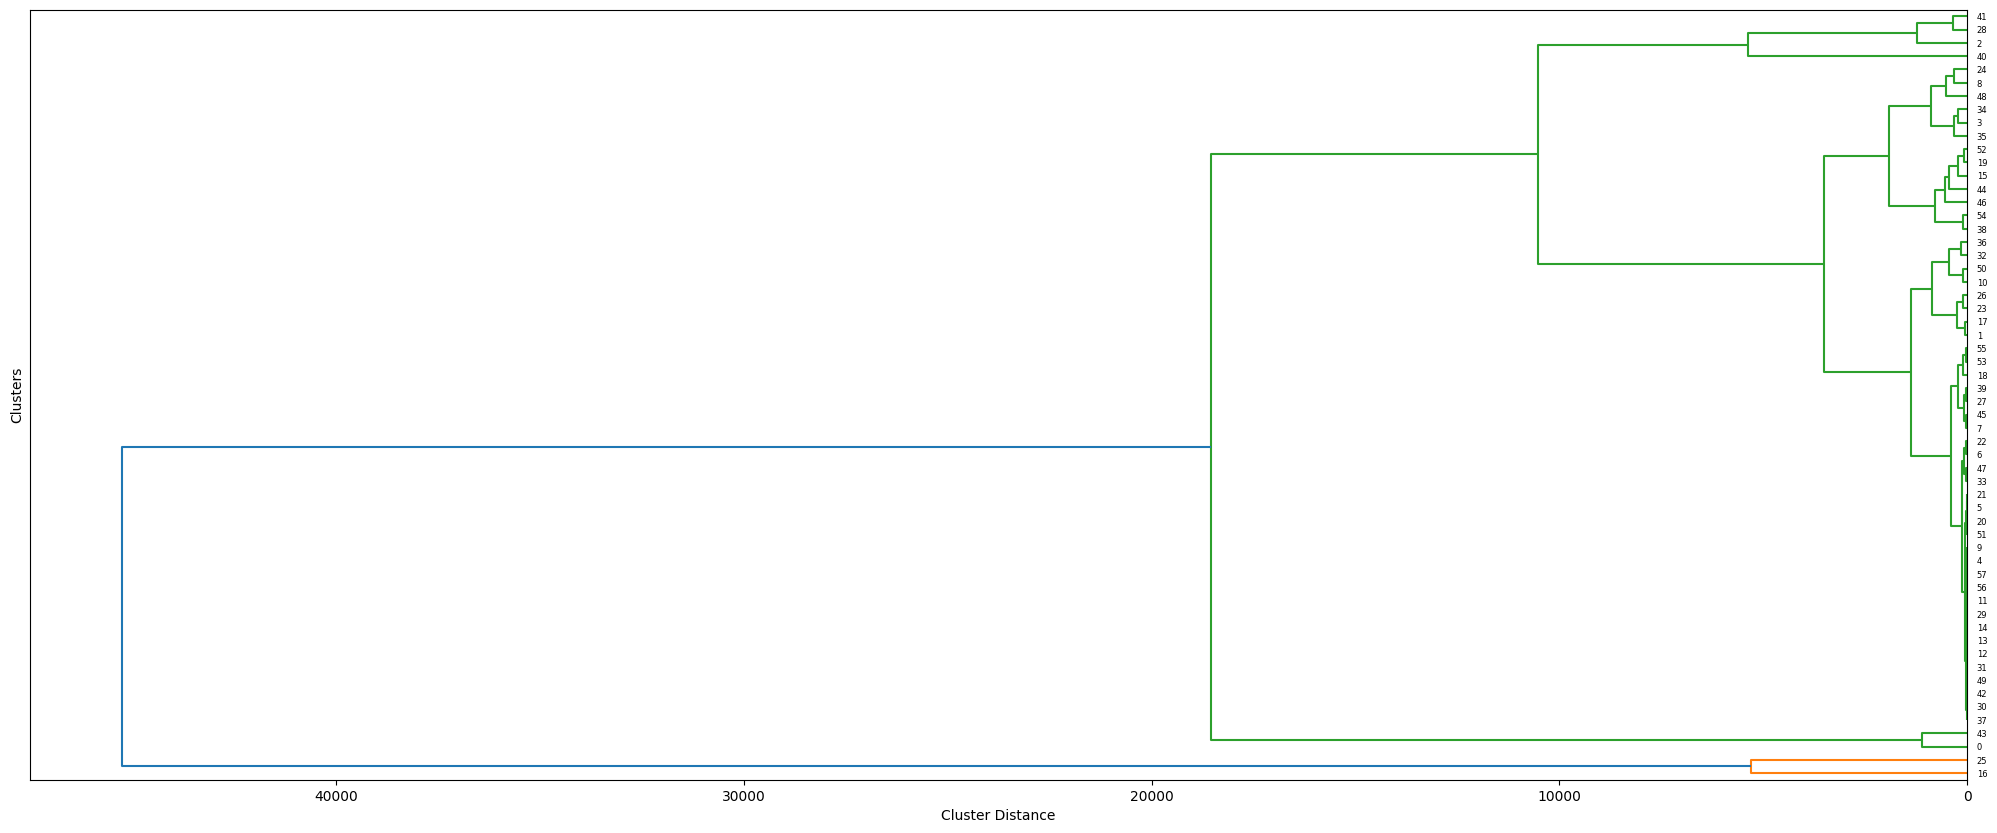

Linkage Method: average


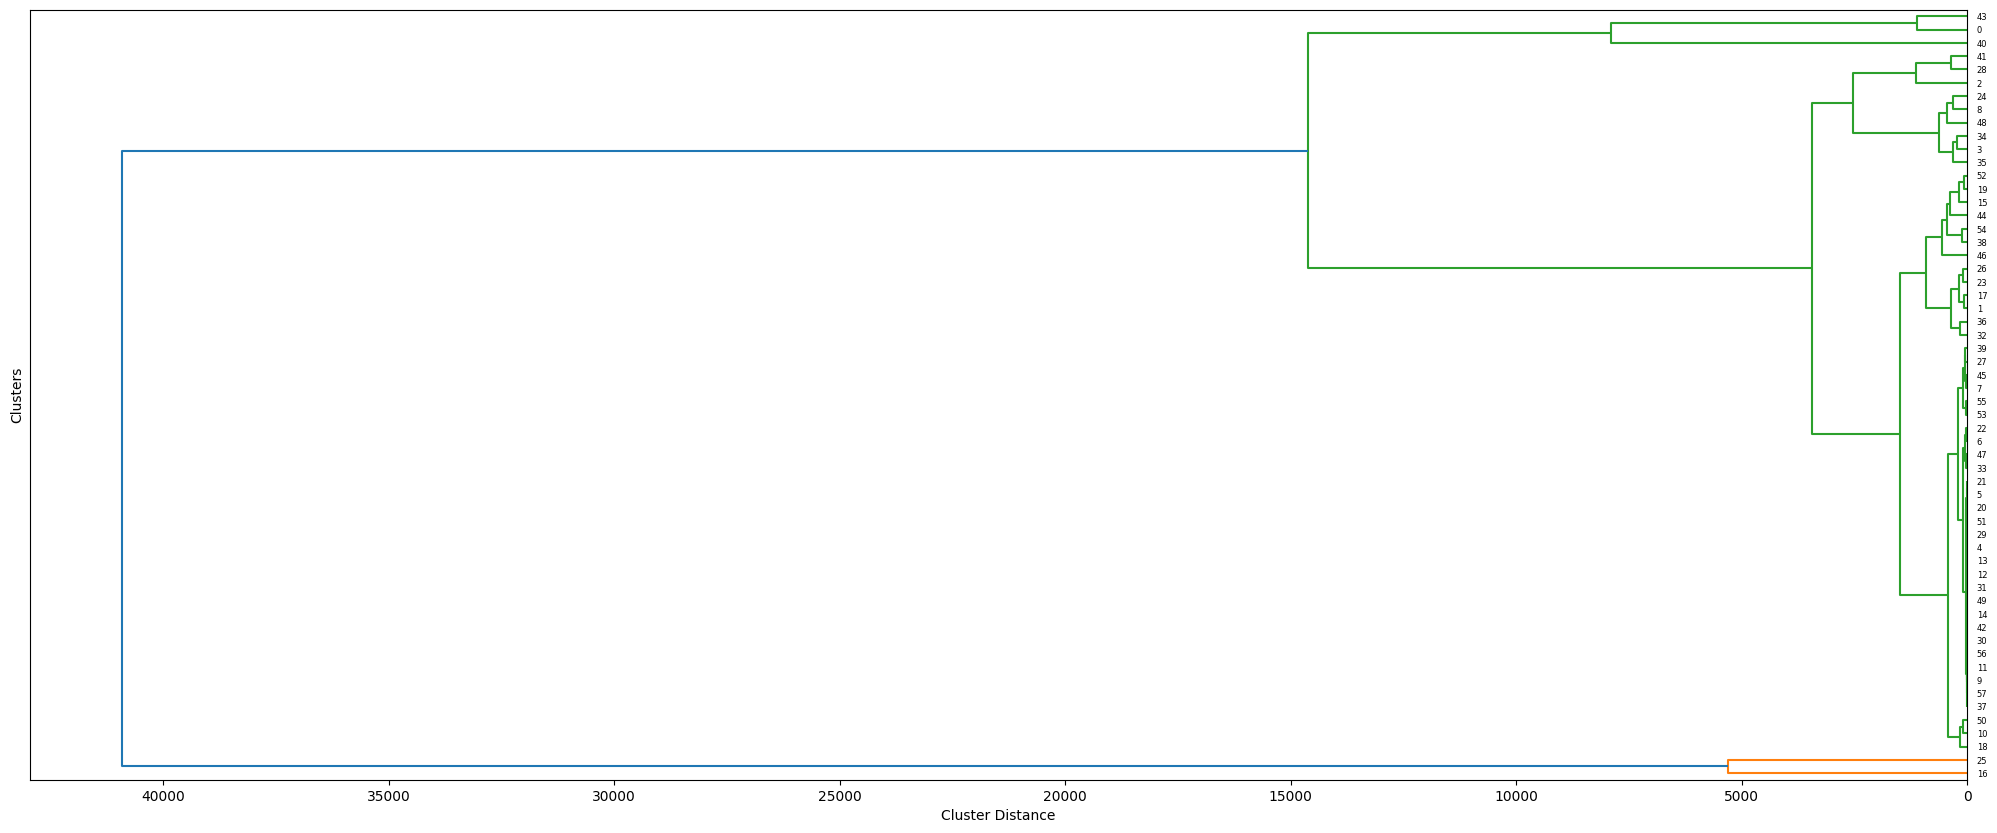

Linkage Method: weighted


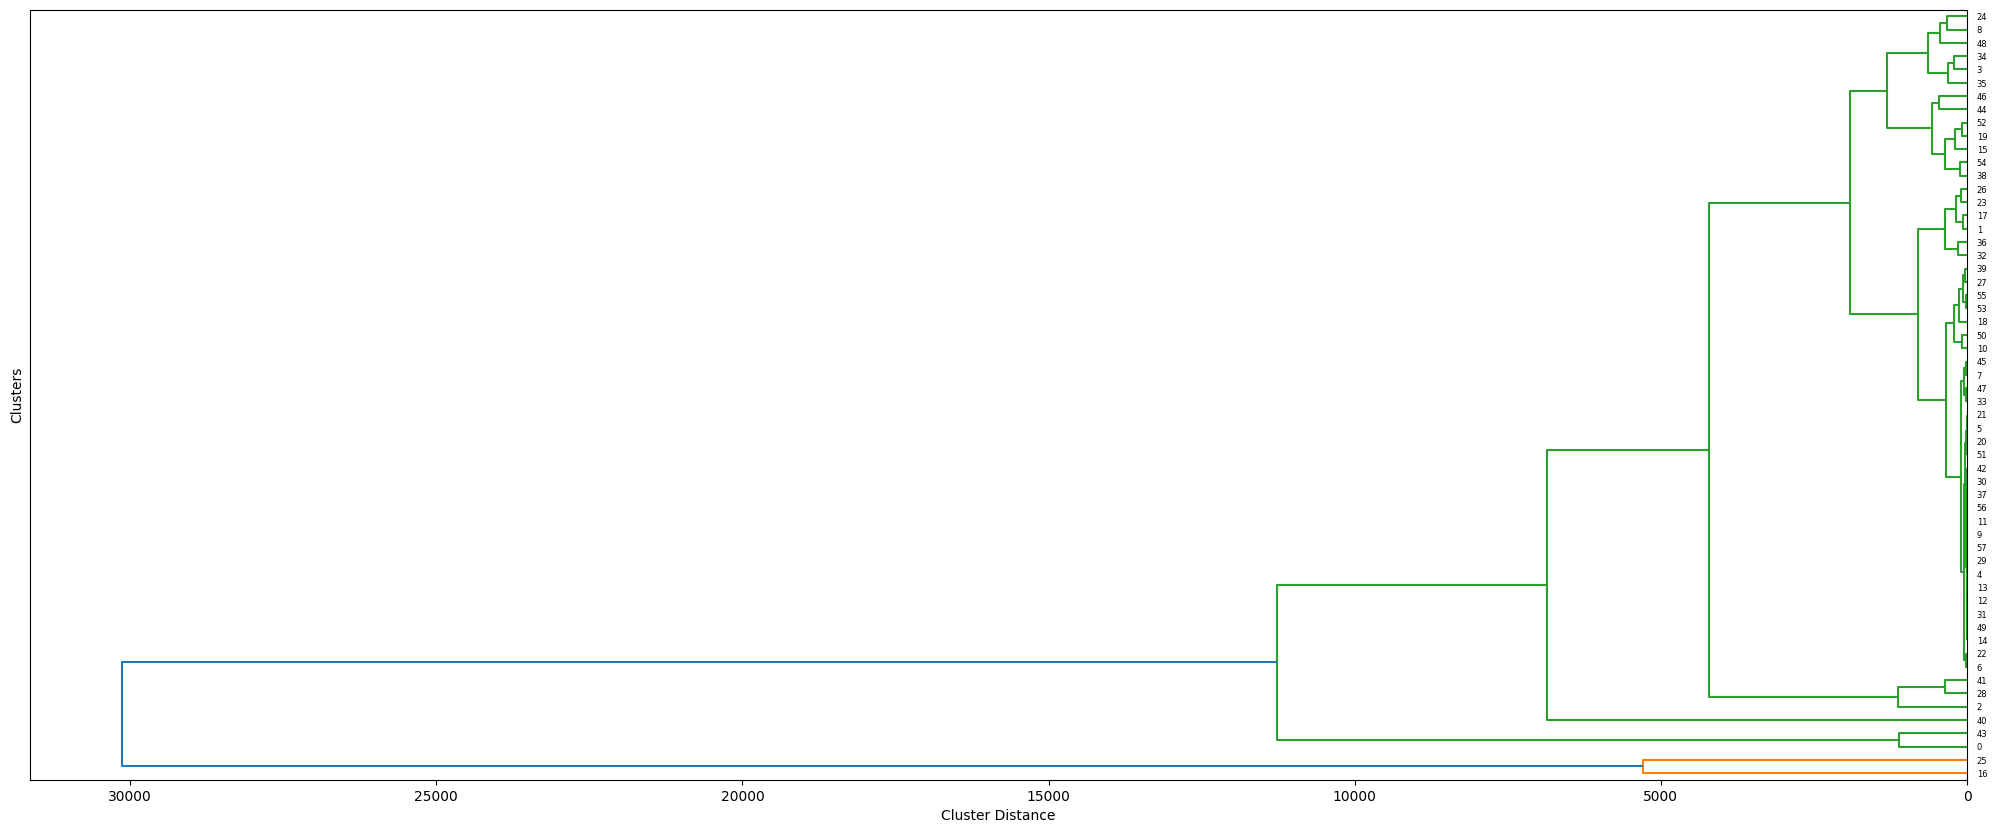

Linkage Method: centroid


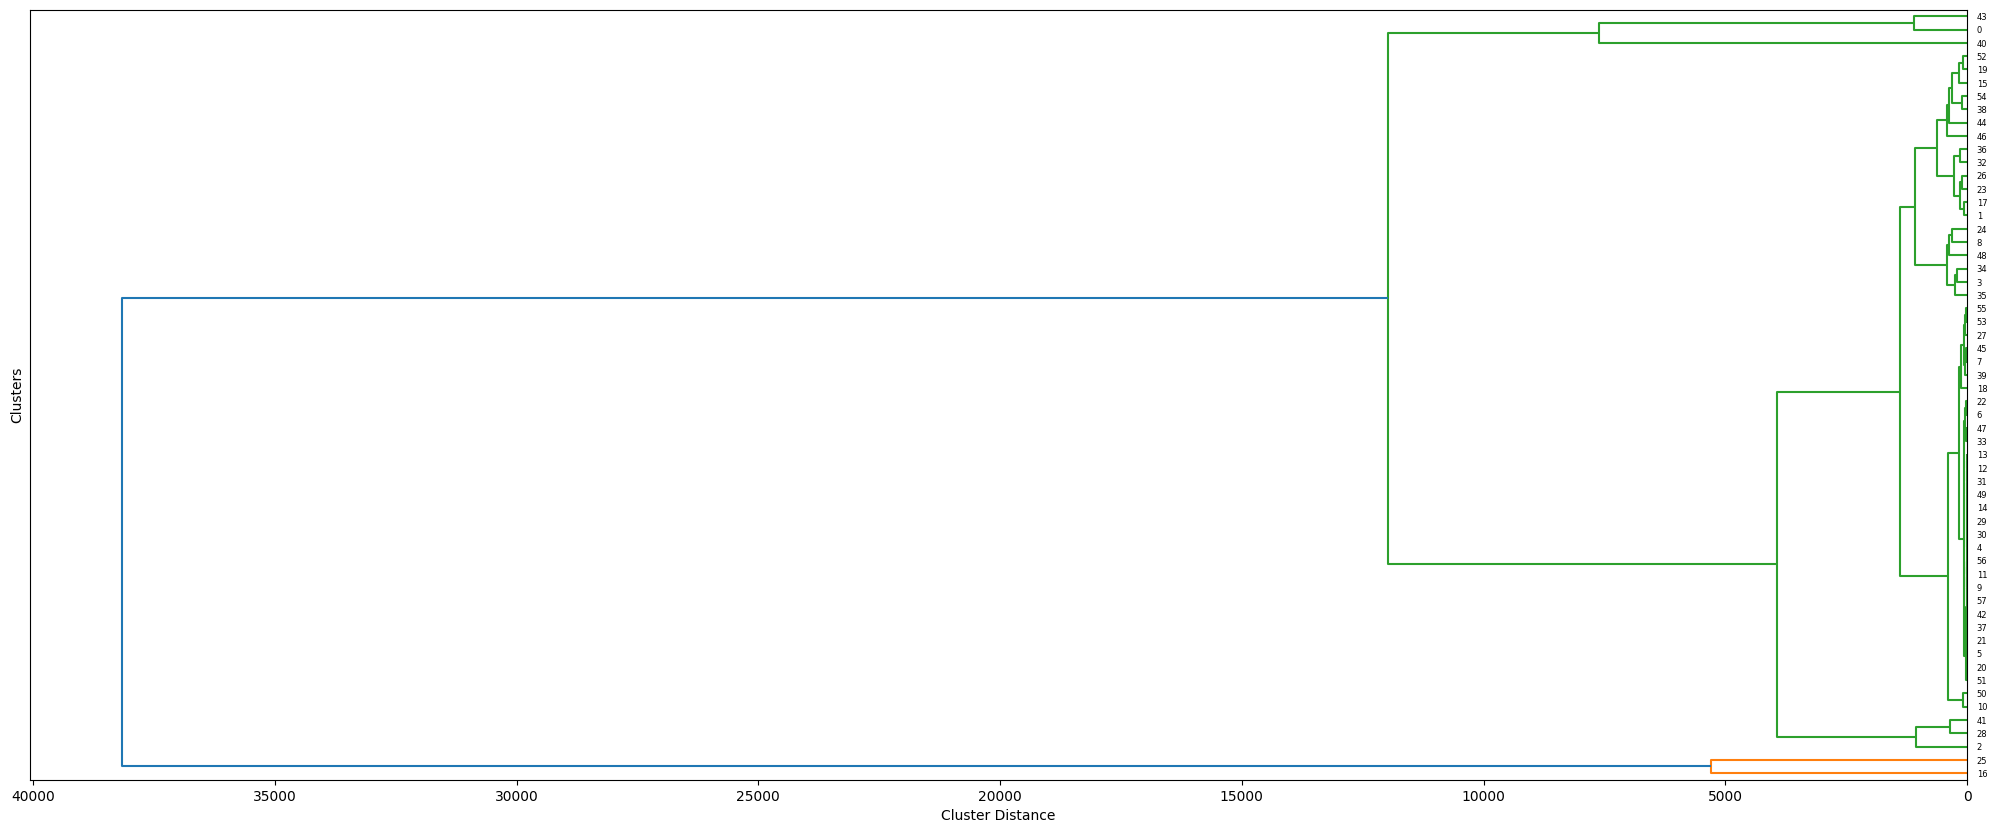

Linkage Method: ward


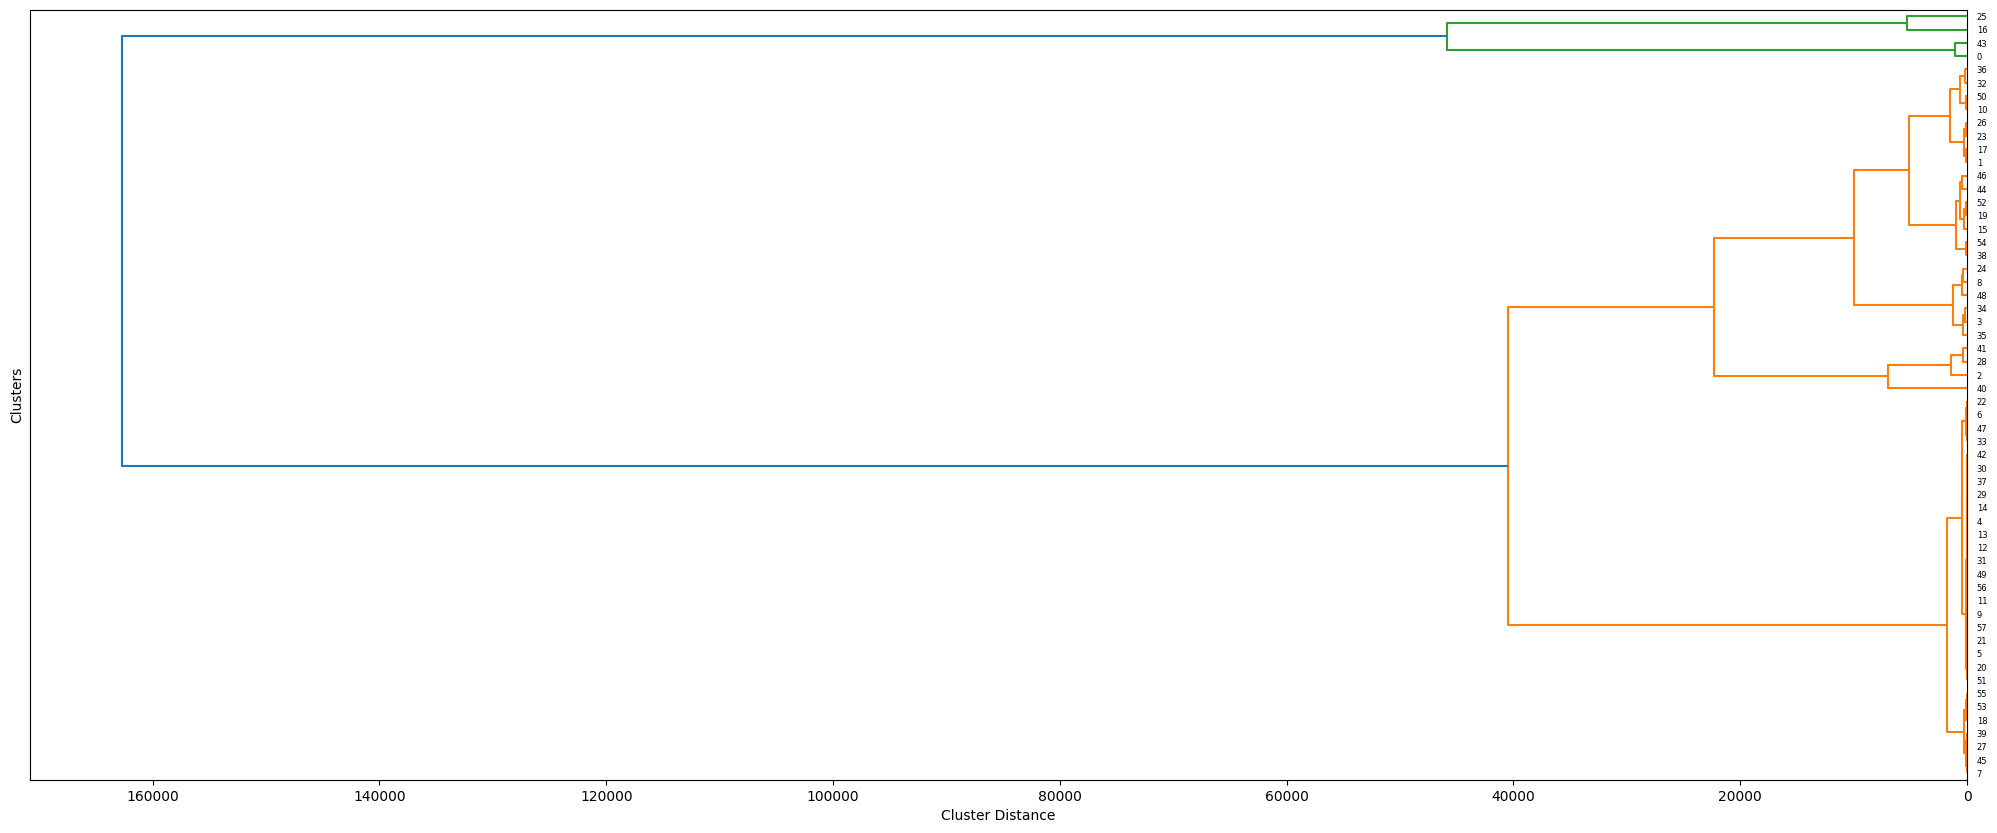

In [13]:
print("Checking different Methods")
hc(data[:, 1:])

### Checking Column Dropping

With all columns


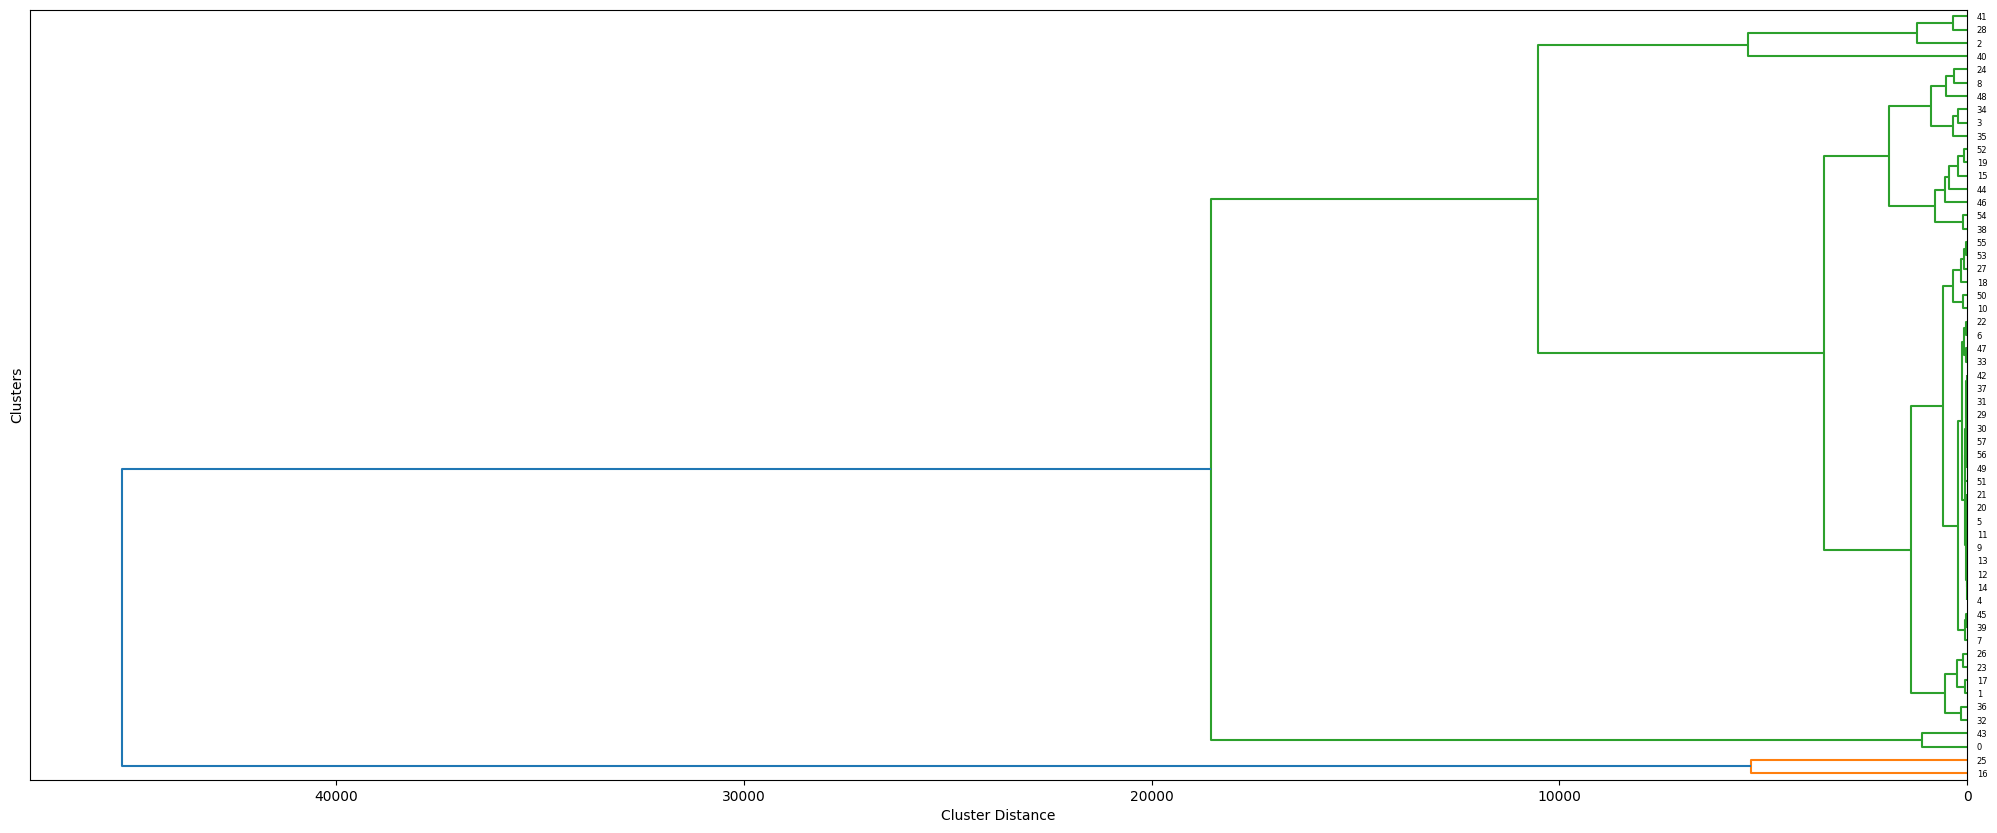

Without id column


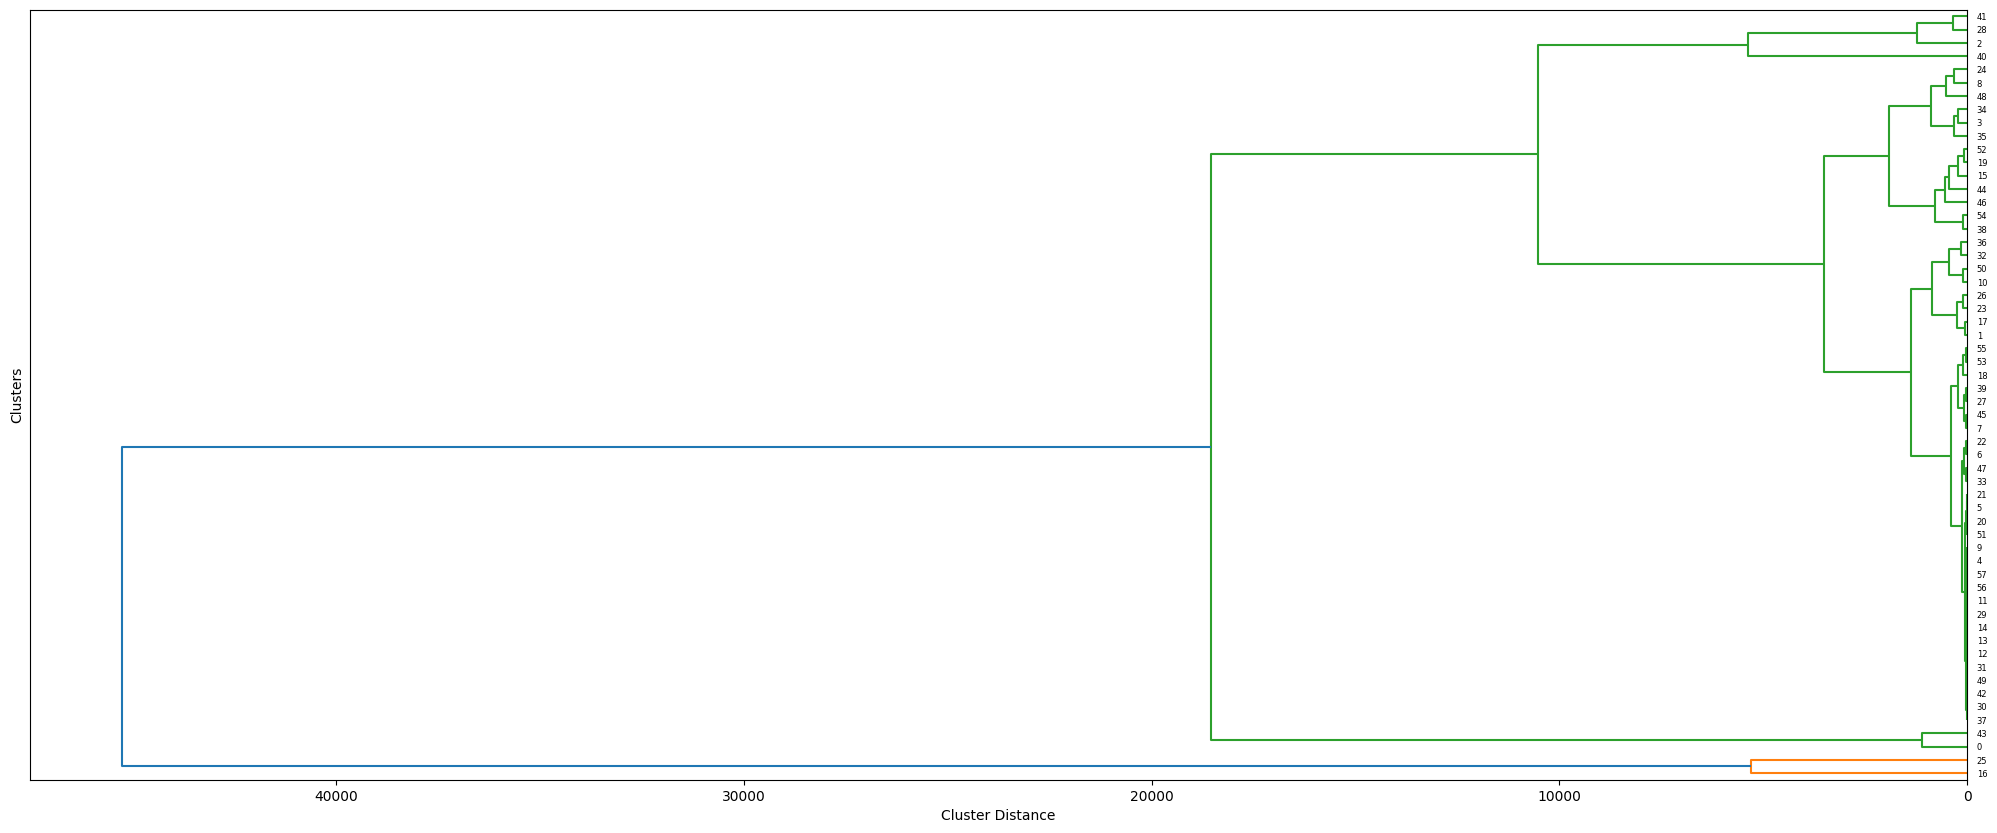

Without id, one numeric column


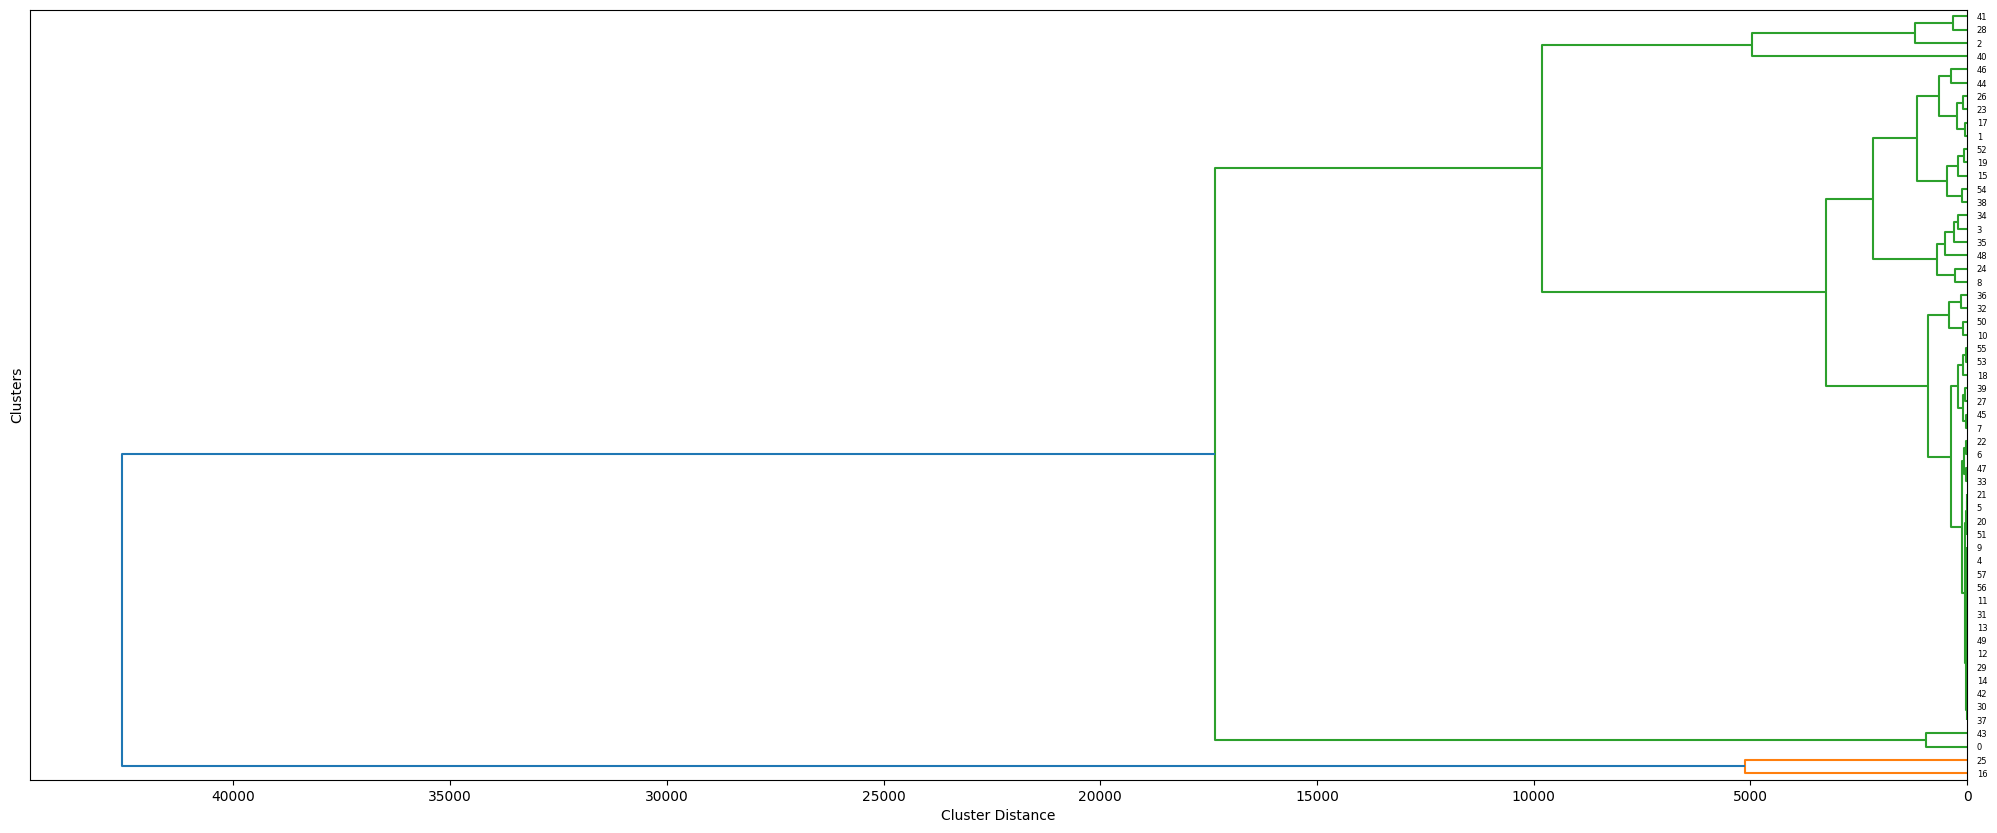

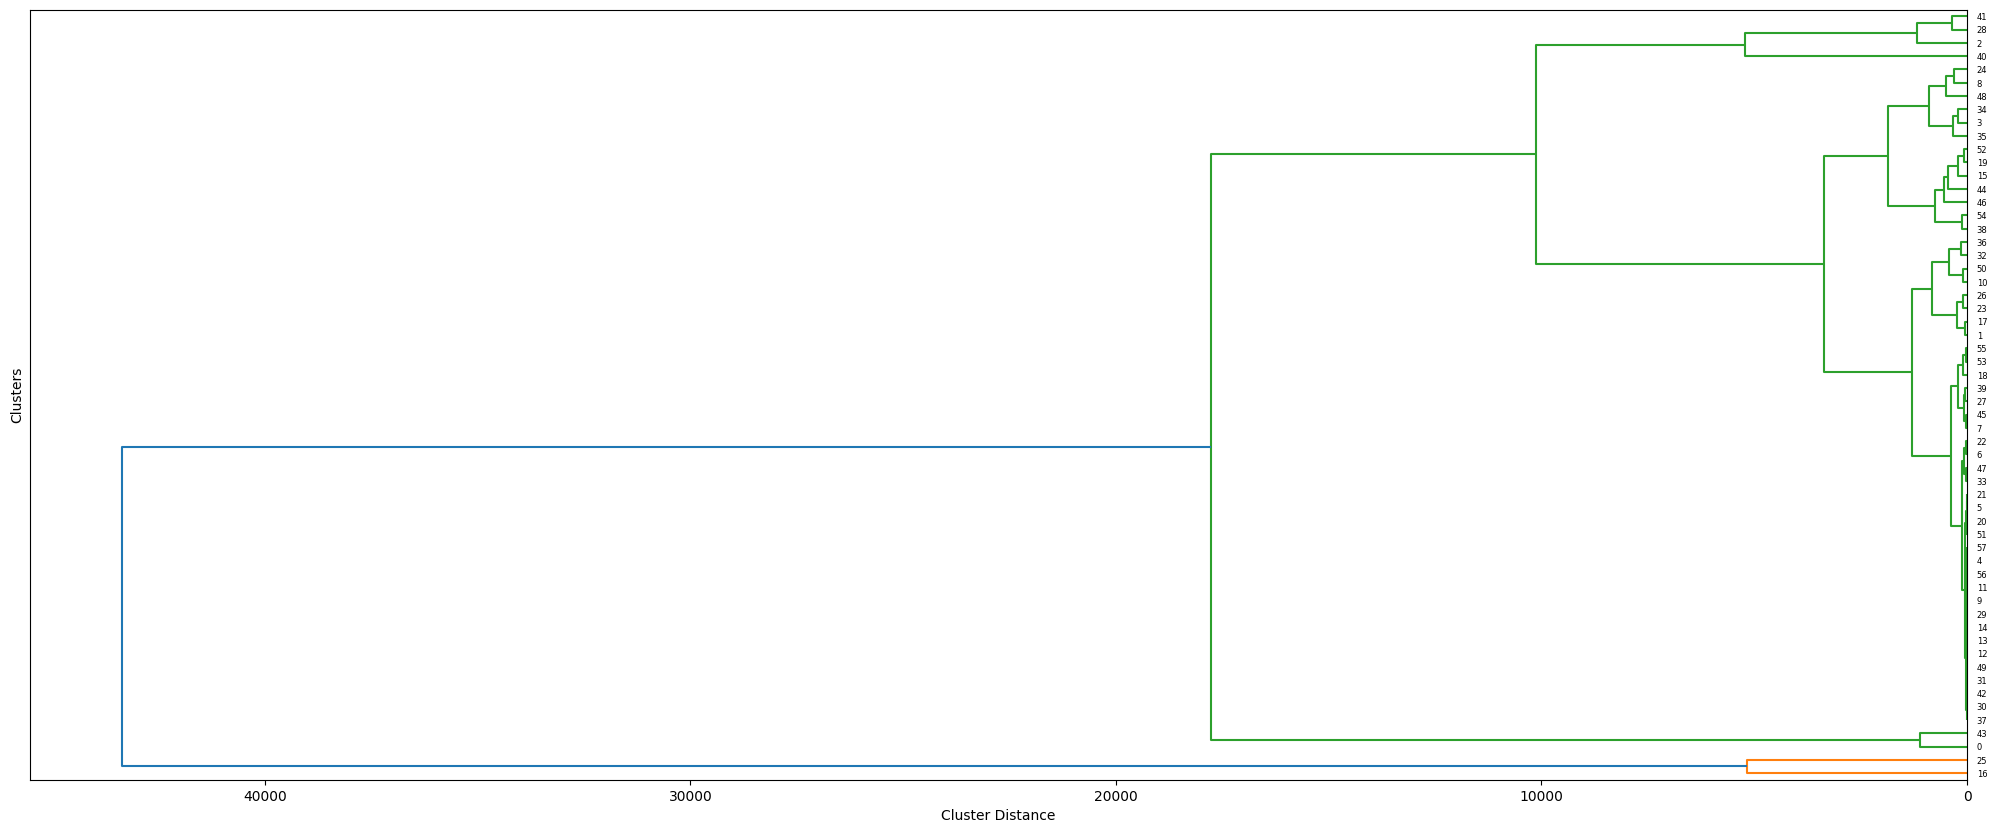

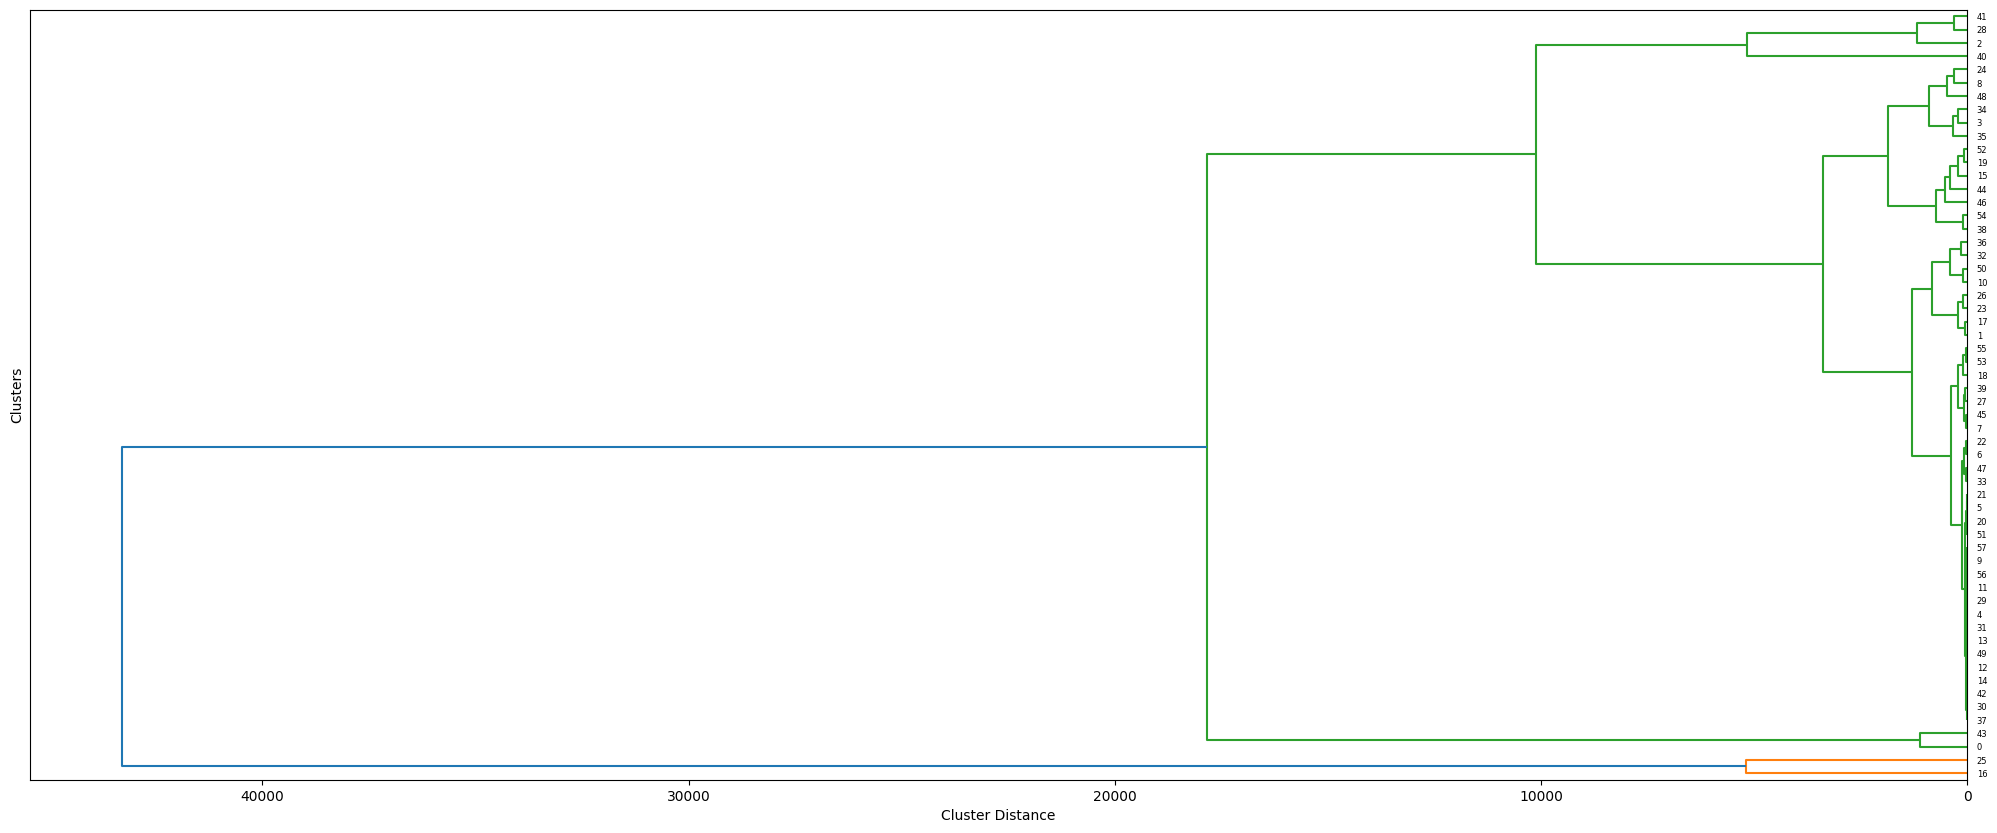

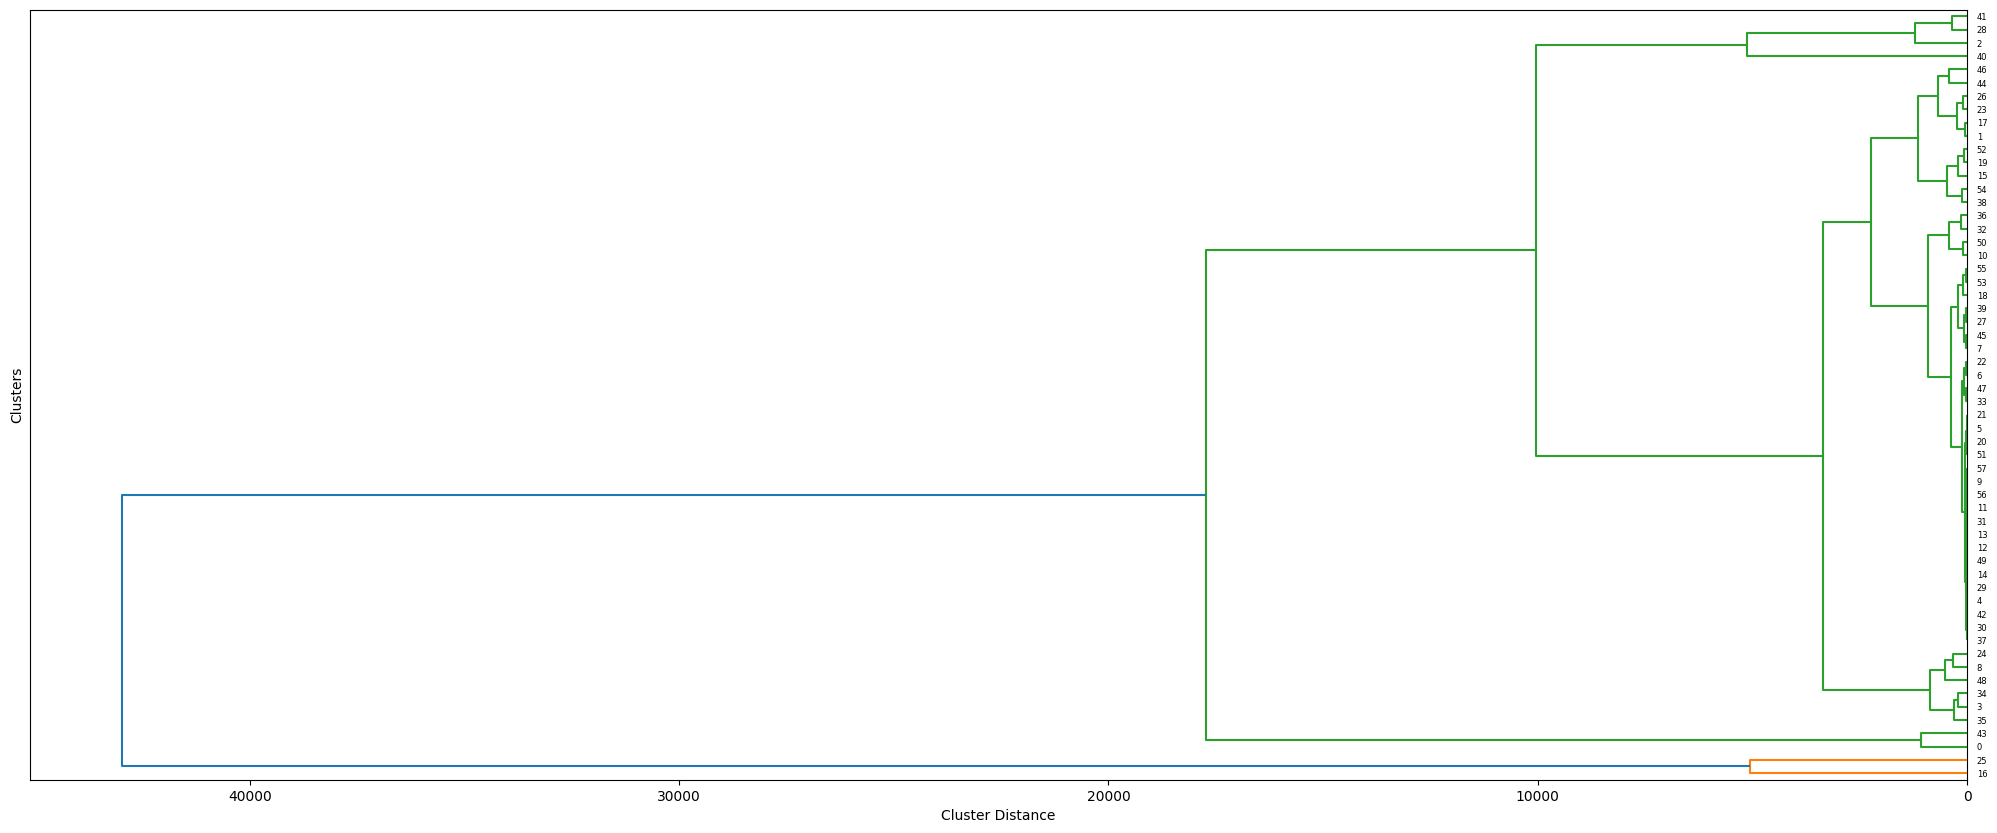

In [16]:
print("With all columns")
hc(data, all=False, linkage_method='complete')

print("Without id column")
hc(data[:, 1:], all=False, linkage_method='complete')

print("Without id, one numeric column")
hc(np.concatenate((data[:, 1:2], data[:, 3:]), axis=1), all=False, linkage_method='complete')
hc(np.concatenate((data[:, 1:3], data[:, 4:]), axis=1), all=False, linkage_method='complete')
hc(np.concatenate((data[:, 1:4], data[:, 5:]), axis=1), all=False, linkage_method='complete')
hc(np.concatenate((data[:, 1:5], data[:, 6:]), axis=1), all=False, linkage_method='complete')

> #### Observations

On varying the linkage method, there isn't much difference, but the `Ward Linkage` and `Centroid` linkages don't look much balanced. Apart from that, there isn't much difference in it

On dropping the `id` column, the clustering doesn't change much, as seen from the dendograms. Apart from it, only very few of the columns are necesssary, even not all of them. This can be seen from the dendograms as well, as on dropping some of the numerical columns, the clustering doesn't change much.